# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
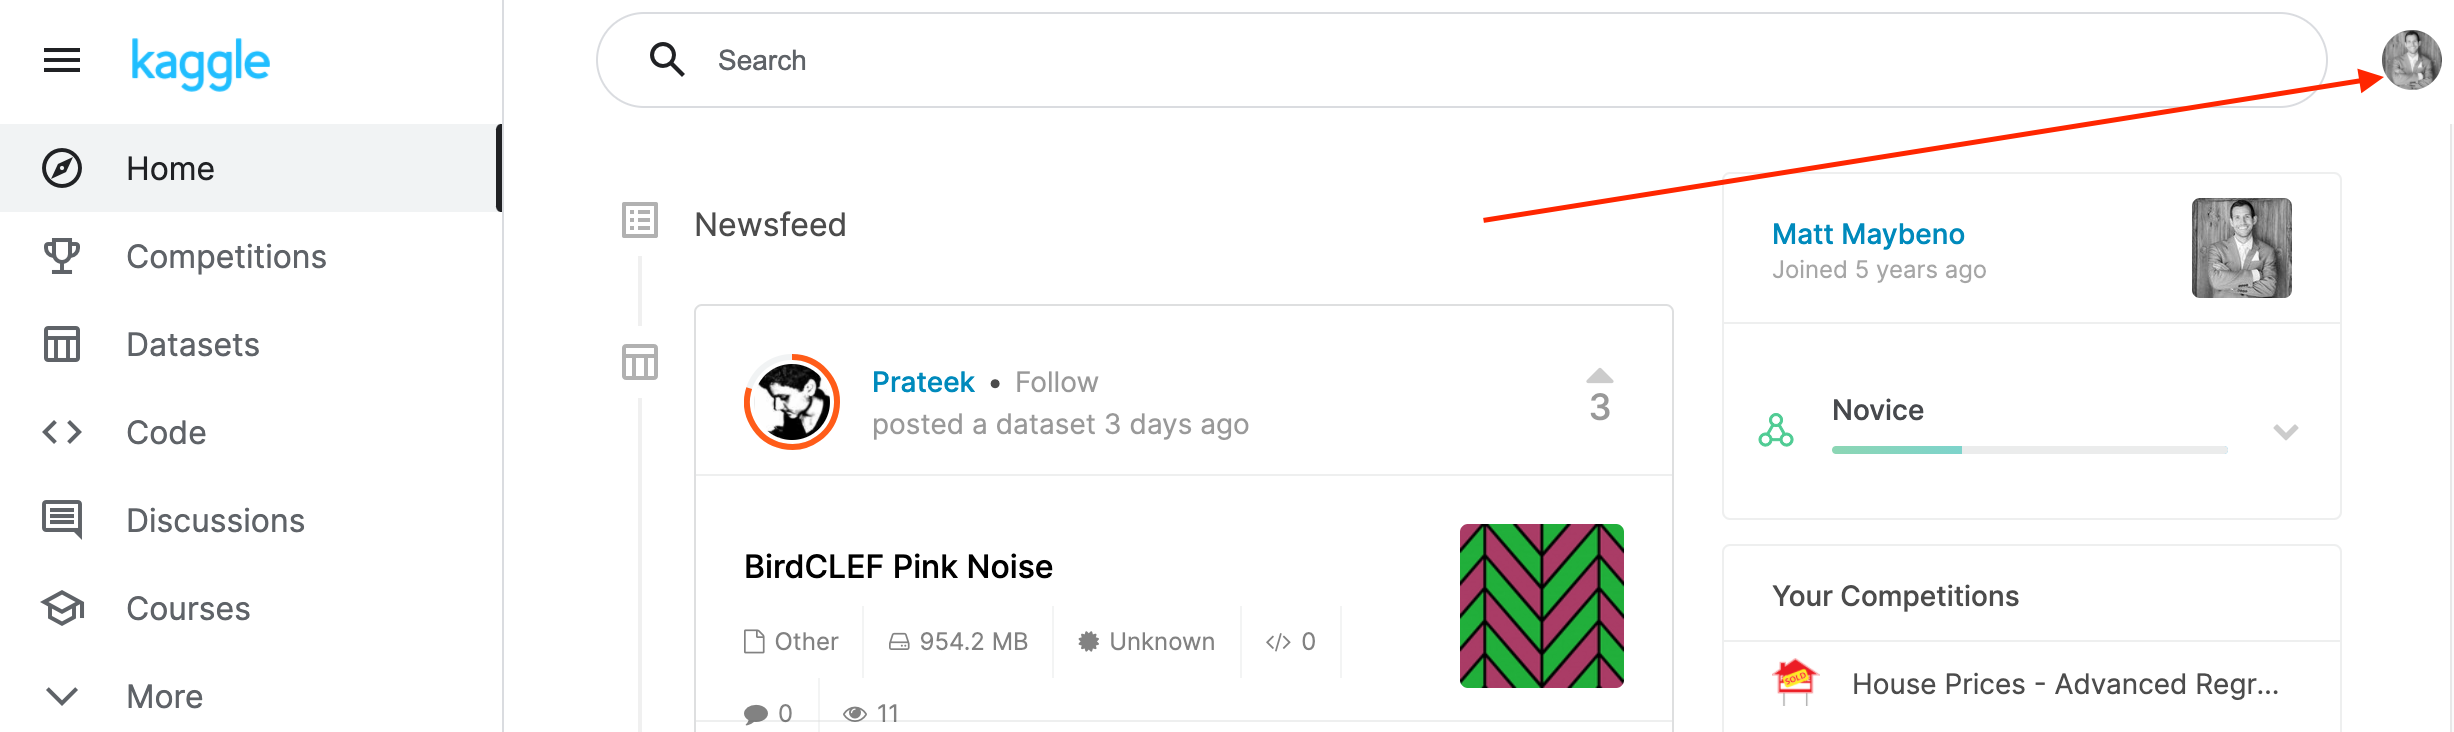
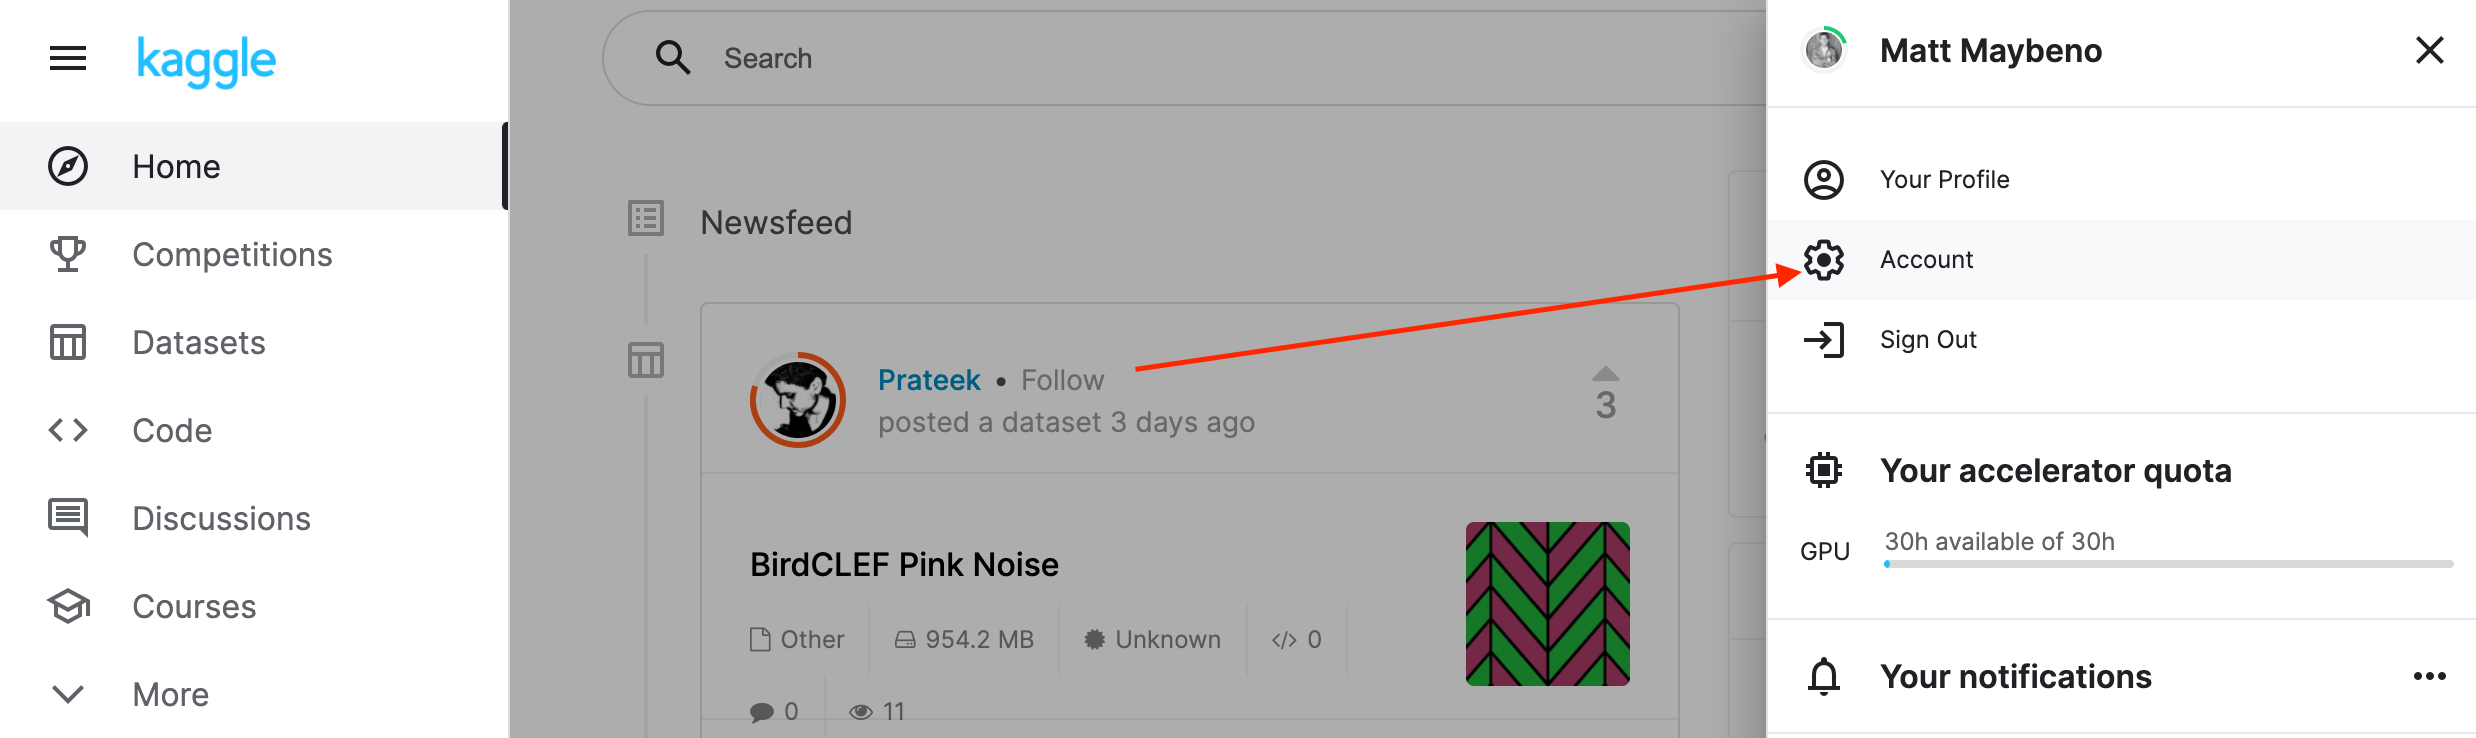
2. Scroll down to API and click Create New API Token.
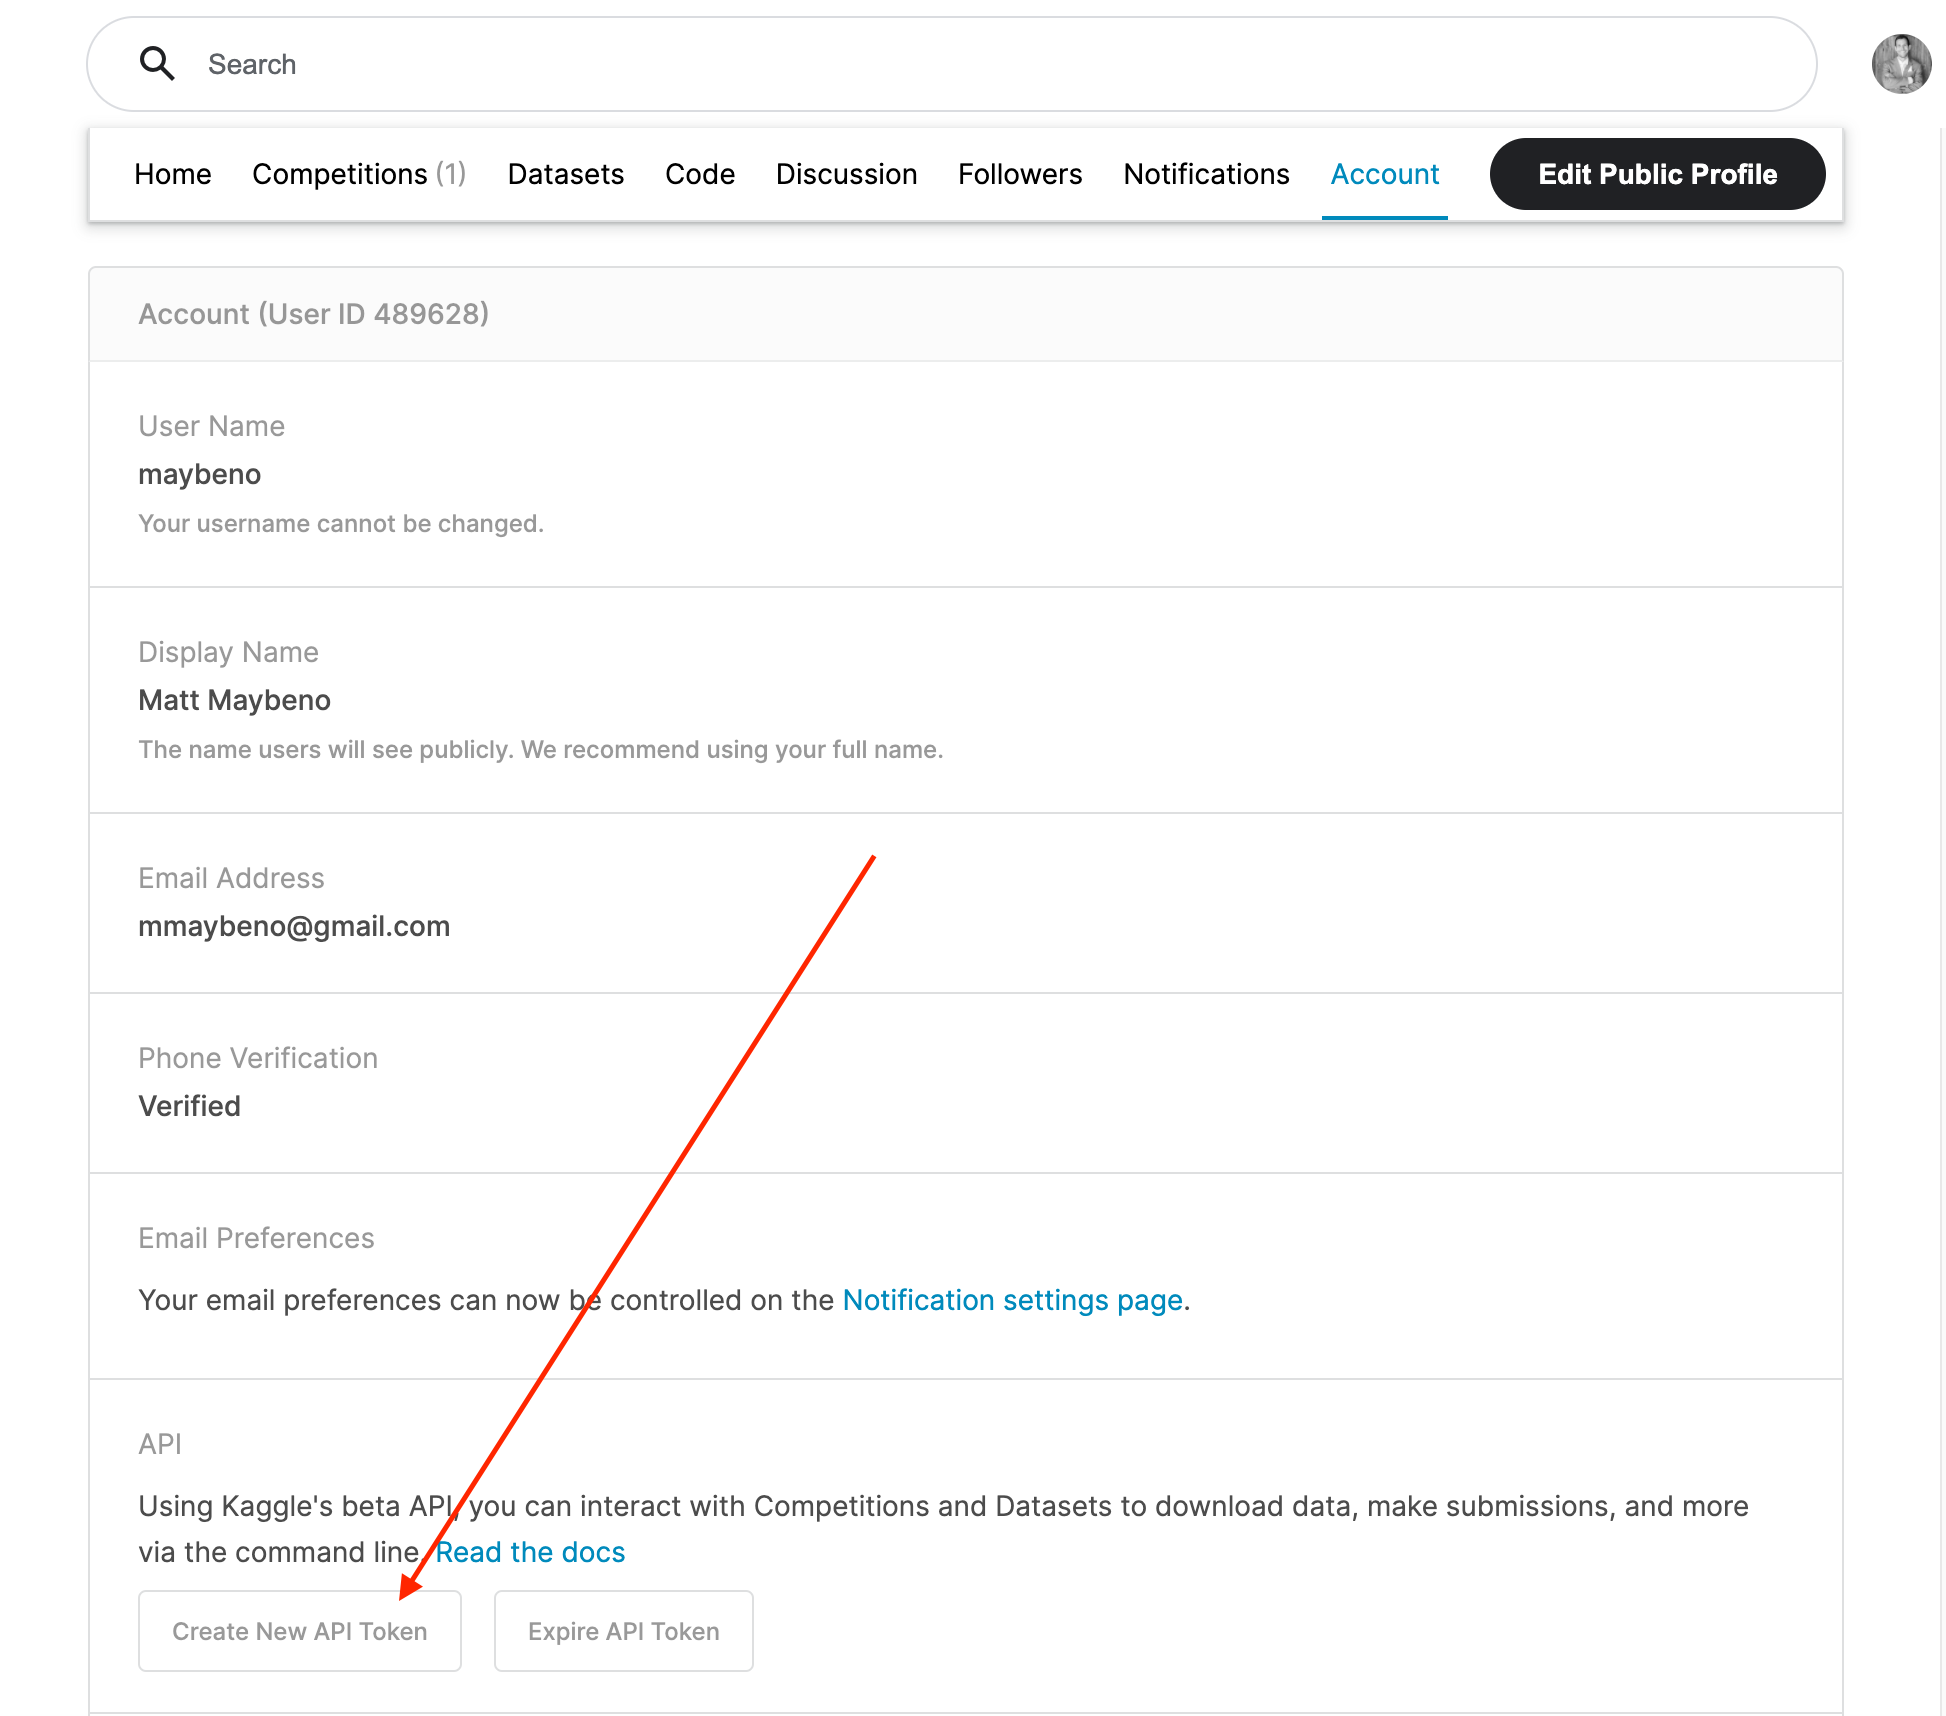
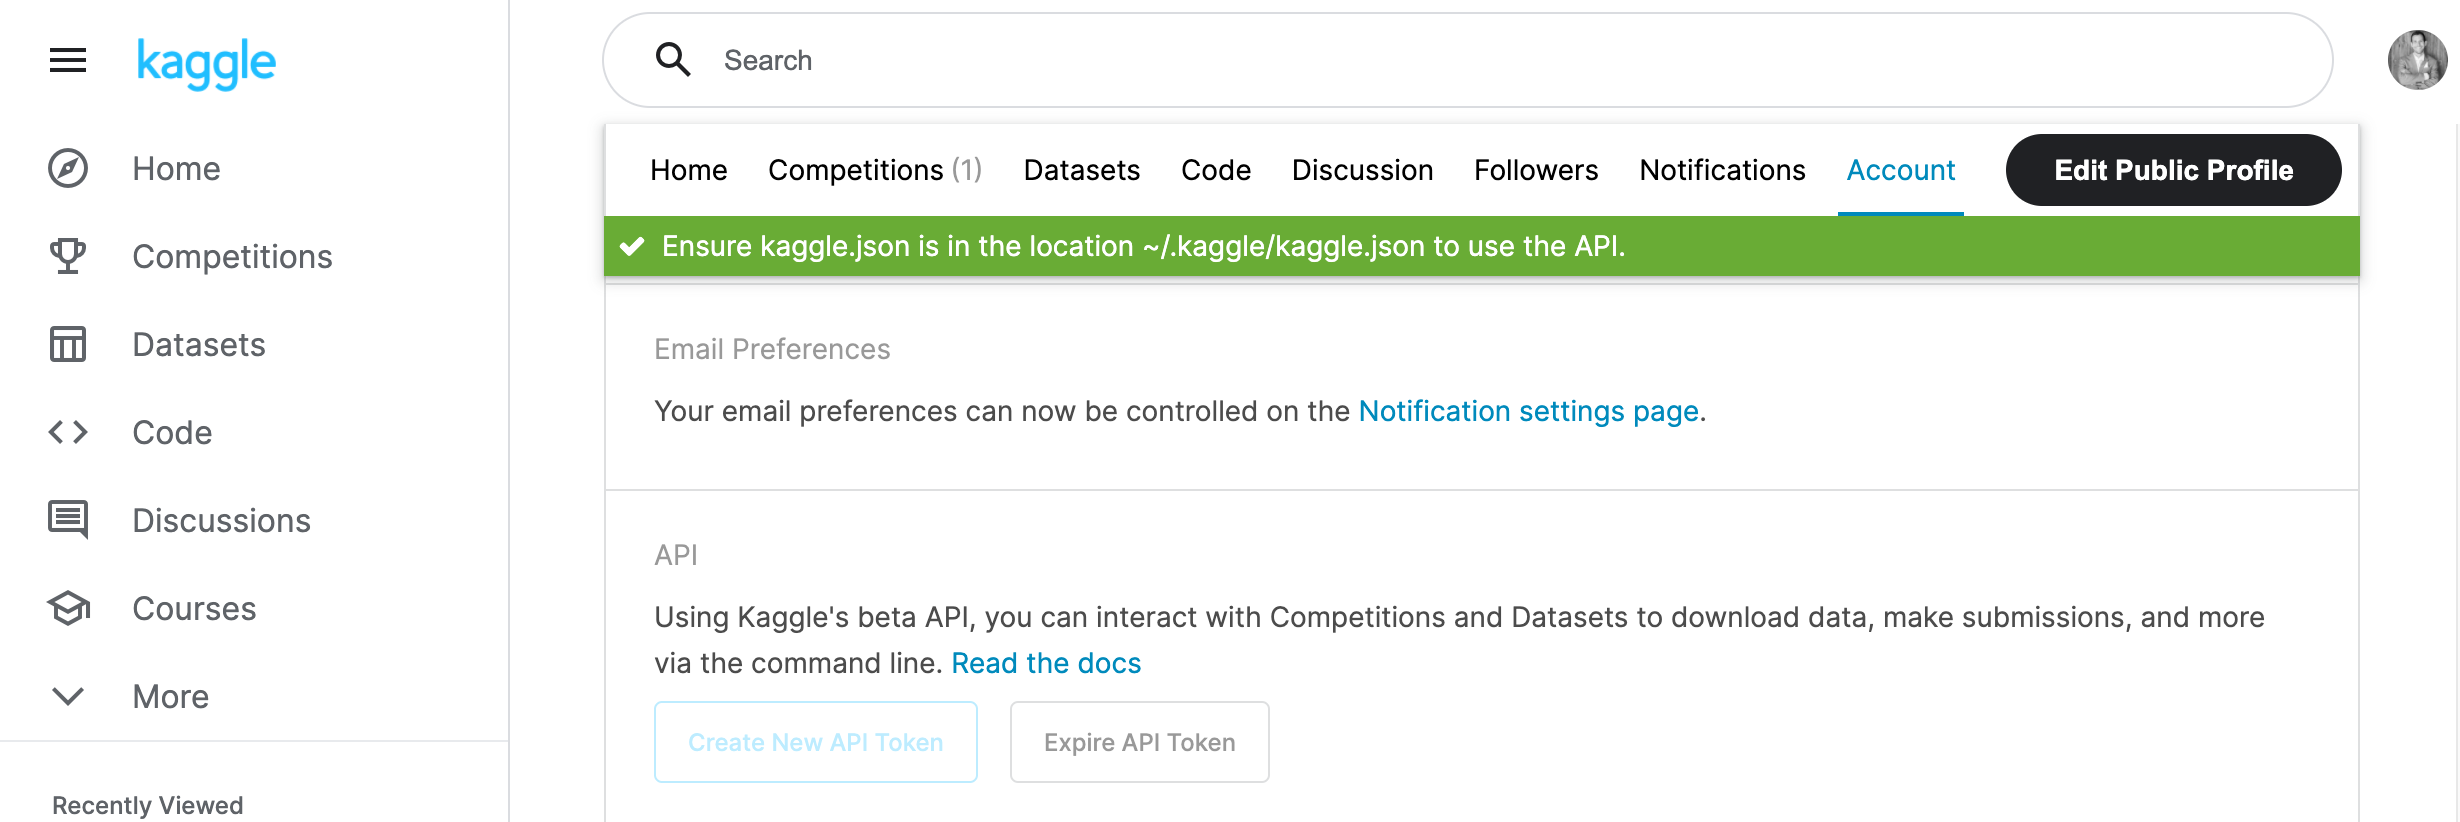
3. Open up `kaggle.json` and use the username and key.
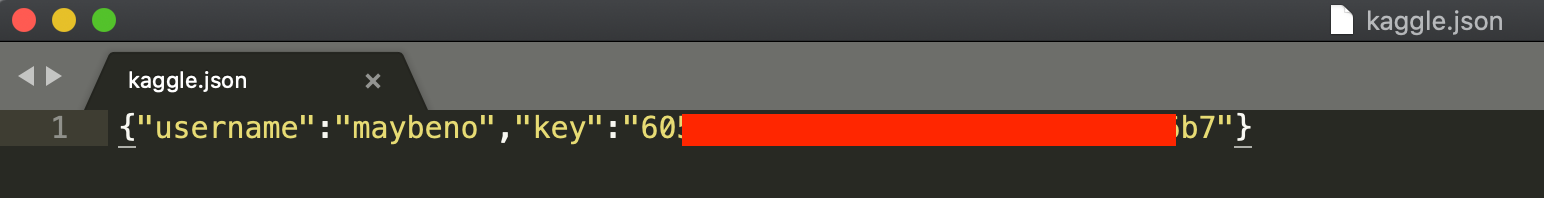

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
# !pip install -U pip
# !pip install -U setuptools wheel
# !pip install -U "mxnet<2.0.0" bokeh==2.0.1
# !pip install autogluon --no-cache-dir
# # Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [2]:
# # create the .kaggle directory and an empty kaggle.json file
# !mkdir -p /root/.kaggle
# !touch /root/.kaggle/kaggle.json
# !chmod 600 /root/.kaggle/kaggle.json

In [3]:
# # Fill in your user name and key from creating the kaggle account and API token file
# import json
# kaggle_username = ""
# kaggle_key = ""

# # Save API token the kaggle.json file
# with open("C:/Users/canku/Downloads/kaggle.json", "w") as f:
#     f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [4]:
# !pip install python-dotenv
from dotenv import dotenv_values

CONFIG = dotenv_values('.env')

kaggle_username = CONFIG['KAGGLE_USERNAME']
kaggle_key = CONFIG['KAGGLE_KEY']

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
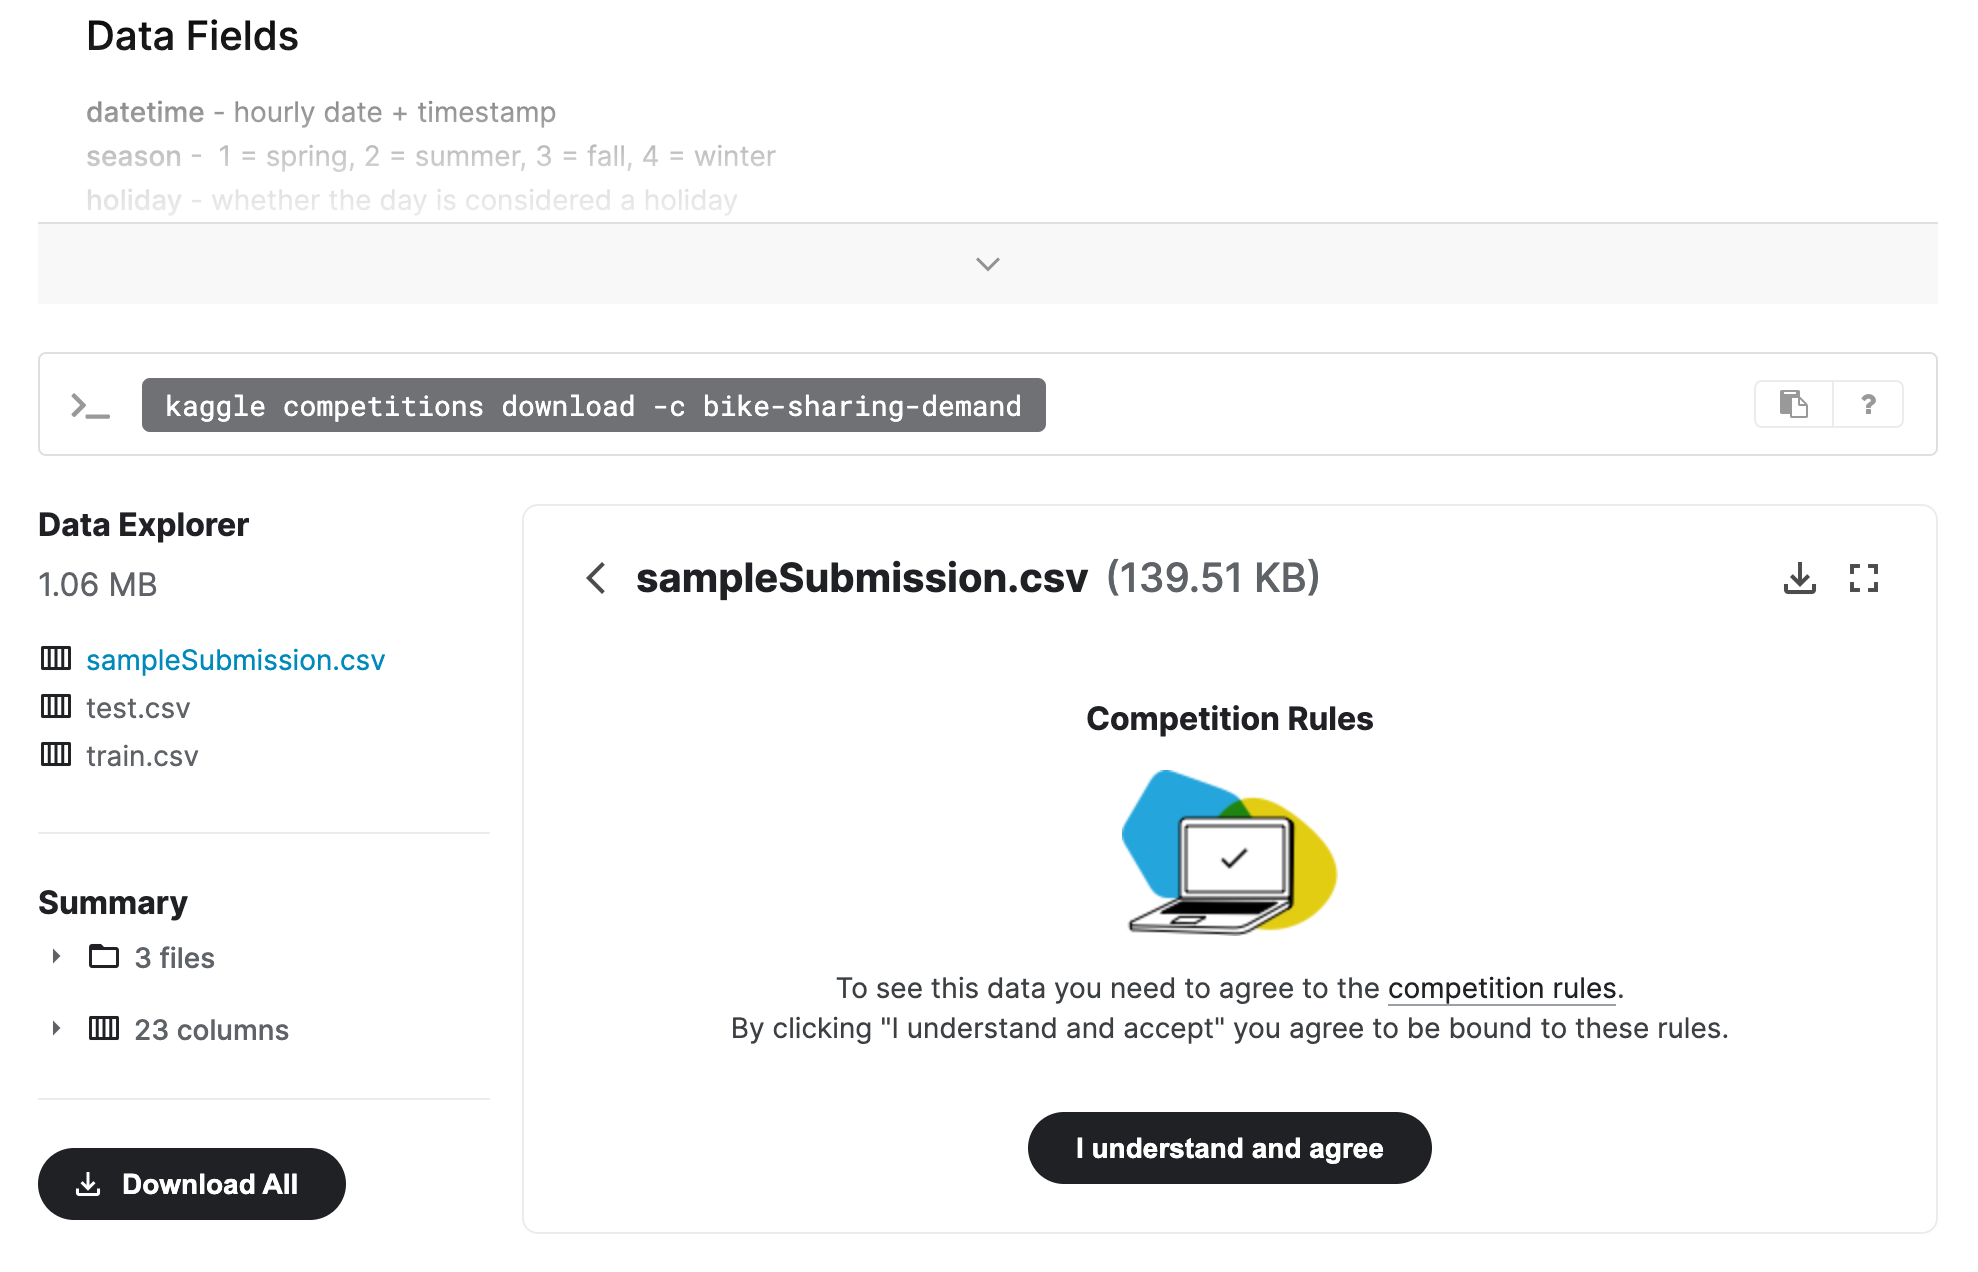

In [2]:
# !pip install kaggle --upgrade

In [5]:
# # Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
# !kaggle competitions download -c bike-sharing-demand
# # If you already downloaded it you can use the -o command to overwrite the file
# !unzip -o bike-sharing-demand.zip

In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [2]:
import os

In [3]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("C:/Users/canku/Downloads/Bike Sharing Demand/cd0385-project-starter/project/bike-sharing-demand/train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("C:/Users/canku/Downloads/Bike Sharing Demand/cd0385-project-starter/project/bike-sharing-demand/test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
# Same thing as train and test dataset
submission = pd.read_csv("C:/Users/canku/Downloads/Bike Sharing Demand/cd0385-project-starter/project/bike-sharing-demand/sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [7]:
train=train.drop(['casual','registered'],axis=1)

In [12]:
predictor = TabularPredictor(label="count",eval_metric='root_mean_squared_error').fit(train_data=train, time_limit=600, presets="best_quality");

No path specified. Models will be saved in: "AutogluonModels\ag-20230523_181601\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels\ag-20230523_181601\"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to prepr

KeyboardInterrupt: 

### Review AutoGluon's training run with ranking of models that did the best.

In [13]:
predictor = TabularPredictor.load("AutogluonModels/ag-20230515_141433/")

In [14]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -50.111361       6.651331  341.244010                0.000000           0.183088            3       True         22
1   NeuralNetFastAI_BAG_L2  -51.078362       5.914288  284.521232                0.118519          11.332952            2       True         18
2   RandomForestMSE_BAG_L2  -53.310008       6.114231  278.982600                0.318462           5.794319            2       True         15
3     ExtraTreesMSE_BAG_L2  -54.034599       6.121218  274.352485                0.325449           1.164205            2       True         17
4     LightGBMLarge_BAG_L2  -54.705554       5.921066  277.482123                0.125297           4.293843            2       True         21
5          LightGBM_BAG_L2  -54.928565       5.872927  275.158634         

c:\Users\canku\anaconda3\lib\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFa

In [15]:
predictor.leaderboard(train, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist_BAG_L1,-0.000000,-84.146423,0.027864,0.020156,0.024998,0.027864,0.020156,0.024998,1,True,2
1,WeightedEnsemble_L2,-0.000000,-84.146423,0.029862,0.021156,0.235725,0.001999,0.001000,0.210727,2,True,12
2,RandomForestMSE_BAG_L1,-42.940297,-116.552091,0.412225,0.284129,1.327580,0.412225,0.284129,1.327580,1,True,5
3,ExtraTreesMSE_BAG_L1,-45.921869,-124.602302,0.314836,0.274760,0.567552,0.314836,0.274760,0.567552,1,True,7
4,ExtraTreesMSE_BAG_L2,-61.853775,-54.034599,15.505670,6.121218,274.352485,0.329253,0.325449,1.164205,2,True,17
5,KNeighborsUnif_BAG_L1,-70.692399,-101.588176,0.027520,0.022691,0.031996,0.027520,0.022691,0.031996,1,True,1
6,LightGBMLarge_BAG_L2,-72.212053,-54.705554,15.477394,5.921066,277.482123,0.300978,0.125297,4.293843,2,True,21
7,RandomForestMSE_BAG_L2,-73.160241,-53.310008,15.503957,6.114231,278.982600,0.327541,0.318462,5.794319,2,True,15
8,XGBoost_BAG_L2,-76.216814,-55.031141,15.406445,5.841043,275.347529,0.230029,0.045274,2.159249,2,True,19
9,LightGBMLarge_BAG_L1,-78.598437,-128.562755,1.026659,0.431591,6.009581,1.026659,0.431591,6.009581,1,True,11


In [ ]:
predictor.feature_importance(data=train)

Computing feature importance via permutation shuffling for 9 features using 5000 rows with 5 shuffle sets...
	415.55s	= Expected runtime (83.11s per shuffle set)
	513.23s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
datetime,176.390465,8.224447,5.655225e-07,5,193.324716,159.456215
holiday,-0.190208,0.027906,9.999460e-01,5,-0.132749,-0.247666
season,-1.048343,0.159064,9.999383e-01,5,-0.720829,-1.375858
weather,-1.206053,0.325765,9.994189e-01,5,-0.535298,-1.876809
atemp,-1.751636,0.442294,9.995510e-01,5,-0.840946,-2.662326
windspeed,-3.898382,0.388367,9.999883e-01,5,-3.098730,-4.698035
humidity,-3.961720,0.586480,9.999440e-01,5,-2.754150,-5.169290
temp,-4.552145,0.830031,9.998730e-01,5,-2.843099,-6.261191
workingday,-5.247659,0.516675,9.999889e-01,5,-4.183819,-6.311500


In [8]:
def round_to_zero(predictions):
    predictions[predictions < 0] = 0
    return predictions

class TabularPredictorNonNegative(TabularPredictor):
    
    def predict(self, *args, **kwargs):
        predictions = super().predict(*args, **kwargs)
        return round_to_zero(predictions)

def save_submission(y_pred, file_name='submission.csv'):
    dirname = 'submission_files'
    if not os.path.exists(dirname):
        os.makedirs(dirname)
    
    submission = pd.read_csv("C:/Users/canku/Downloads/Bike Sharing Demand/cd0385-project-starter/project/bike-sharing-demand/sampleSubmission.csv")
    submission['count'] = y_pred
    assert (submission['count'] >= 0).all()
    submission.to_csv(os.path.join(dirname, file_name), index=False)

In [ ]:
y_pred = predictor.predict(test)
y_pred=pd.DataFrame(y_pred,columns=['count'])
y_pred

,count
0,27.218353
1,42.206463
2,47.508812
3,50.033142
4,52.505676
...,...
6488,176.713547
6489,176.717743
6490,160.519806
6491,155.903961


### Create predictions from test dataset

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [20]:
# Describe the `predictions` series to see if there are any negative values
y_pred.describe()

,count
count,6493.000000
mean,100.327850
std,87.795570
min,1.926283
25%,21.896229
50%,68.008293
75%,168.988174
max,348.982239


In [21]:
# How many negative values do we have?
y_pred[y_pred['count'] < 0].count()

count    0
dtype: int64

In [22]:
# Set them to zero
y_pred[y_pred['count'] < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [73]:
submission["count"] = y_pred
submission.to_csv("submission.csv", index=False)

In [74]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/195k [00:00<?, ?B/s]
  4%|▍         | 8.00k/195k [00:00<00:02, 76.3kB/s]
100%|██████████| 195k/195k [00:02<00:00, 88.6kB/s] 


#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [79]:
! kaggle competitions submissions -c bike-sharing-demand 

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2023-05-15 14:30:45  first raw submission  complete  1.77579      1.77579       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating additional features
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

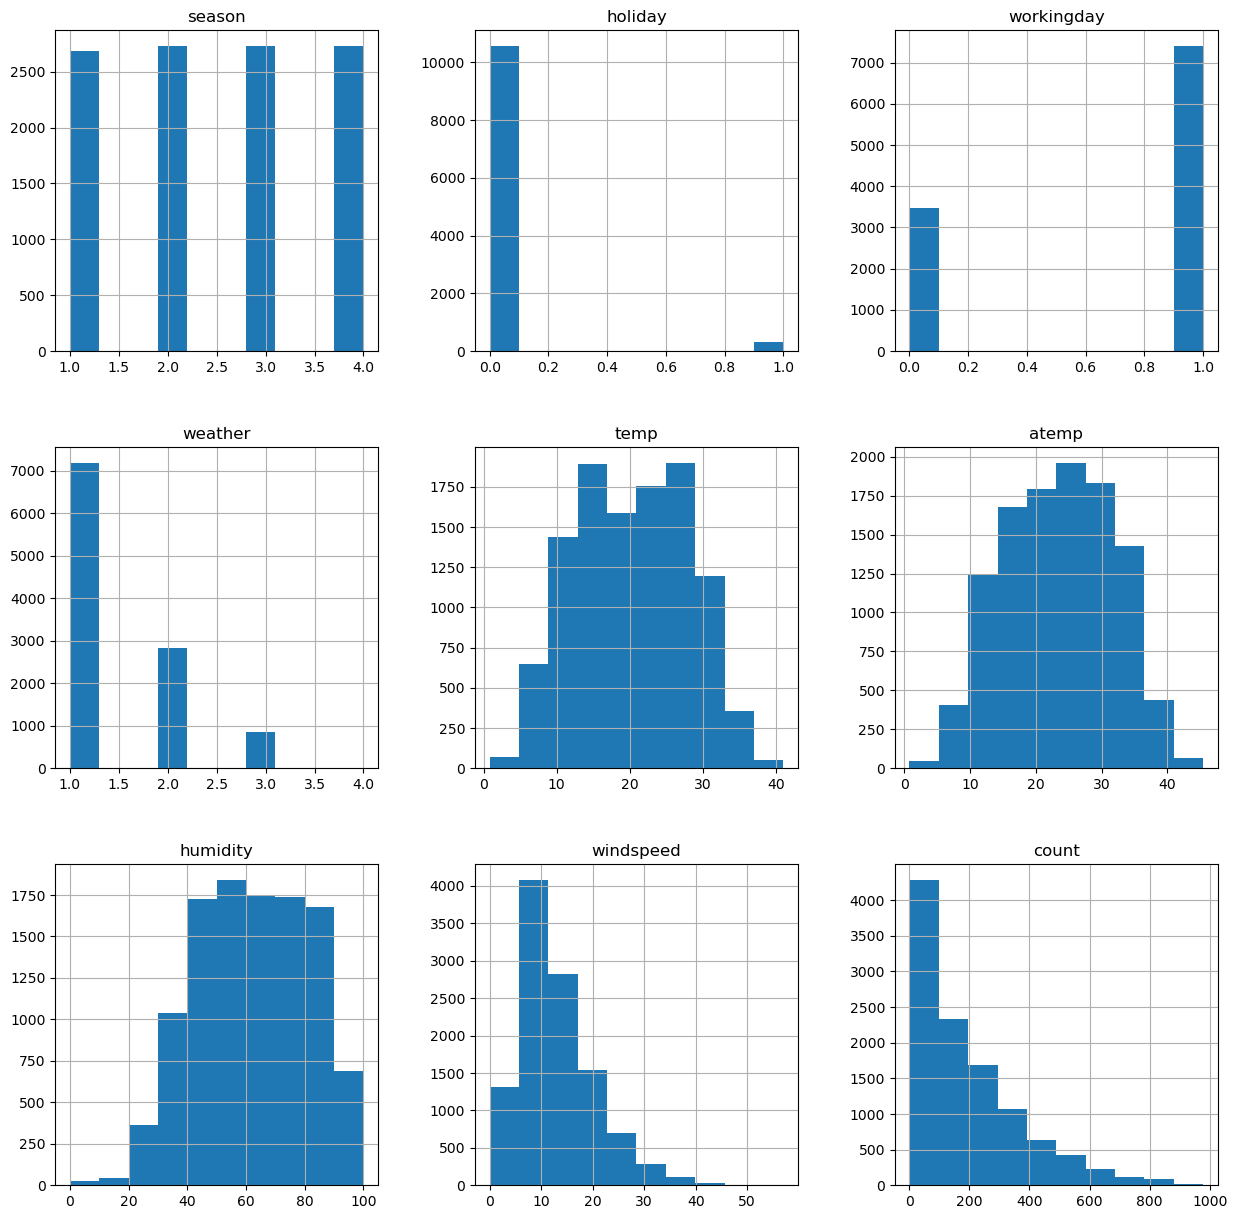

In [9]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15,15));

In [10]:
# create a new feature
def feature_engineering(df: pd.DataFrame) -> pd.DataFrame:

    df = df.copy()
    df['datetime'] = pd.to_datetime(df.datetime)
    
    df['year'] = df.datetime.dt.year
    df['week'] = df.datetime.dt.week
    df['day'] = df.datetime.dt.day
    df['hour'] = df.datetime.dt.hour
    df['weekday'] = df.datetime.dt.day_name()
    df['month'] = df.datetime.dt.month
    df['schoolholiday'] = df.month.apply(lambda x: 1 if x in (6,7,8) else 0)
    df['issunday'] = df.datetime.dt.day.apply(lambda x: 1 if x == 6 else 0)
    
    return df
    
train = feature_engineering(train)
test = feature_engineering(test)
train.head()

C:\Users\canku\AppData\Local\Temp\ipykernel_2852\399363237.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df.datetime.dt.week
C:\Users\canku\AppData\Local\Temp\ipykernel_2852\399363237.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df.datetime.dt.week


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,week,day,hour,weekday,month,schoolholiday,issunday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,52,1,0,Saturday,1,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,52,1,1,Saturday,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,52,1,2,Saturday,1,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,52,1,3,Saturday,1,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,52,1,4,Saturday,1,0,0


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [11]:
def make_categorical(df: pd.DataFrame, cat_features: list):
    for f in cat_features:
        df[f] = df[f].astype('category')
    return df

train = make_categorical(train, ['season', 'weather'])
test = make_categorical(test, ['season', 'weather'])

In [12]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,week,day,hour,weekday,month,schoolholiday,issunday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,52,1,0,Saturday,1,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,52,1,1,Saturday,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,52,1,2,Saturday,1,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,52,1,3,Saturday,1,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,52,1,4,Saturday,1,0,0


C:\Users\canku\AppData\Local\Temp\ipykernel_2852\1689207702.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


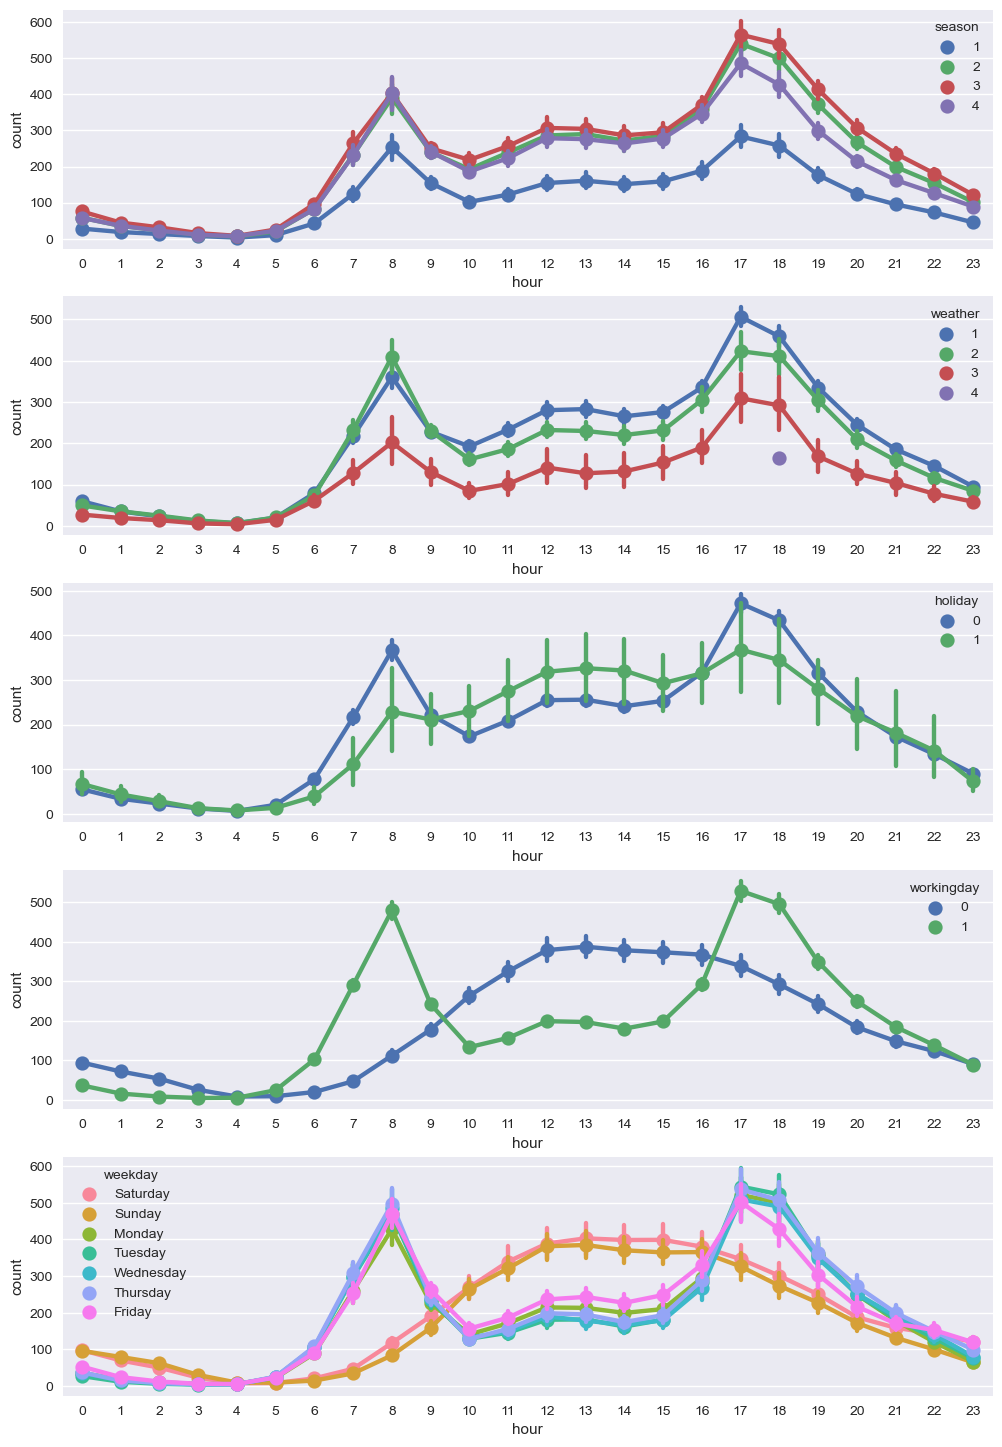

In [13]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

plt.style.use('seaborn')
warnings.filterwarnings('ignore')

f, ax=plt.subplots(5, 1, figsize=(20,10))
f.set_size_inches(12, 18)
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=ax[0])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=ax[1])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=ax[2])
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=ax[3])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=ax[4])
plt.show();

<AxesSubplot: xlabel='hour', ylabel='count'>

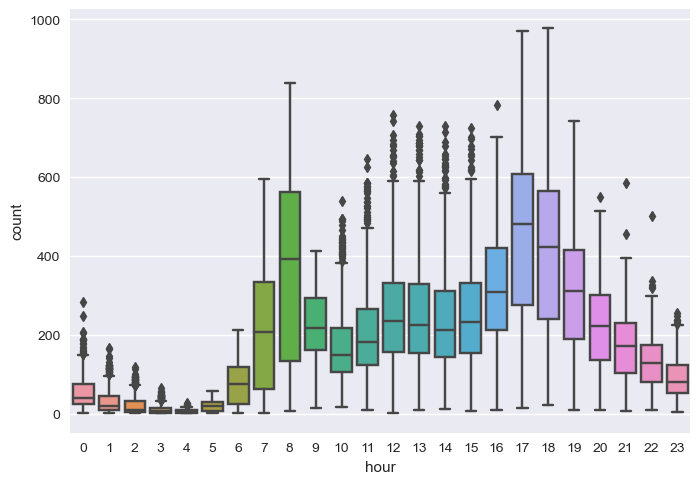

In [14]:
sns.boxplot(x='hour',y='count',data=train)

In [15]:
train['peakhour'] = train[['hour', 'workingday']].apply(lambda x: (0, 1)[(x['workingday'] == 1 and  ( x['hour'] == 8 or 17 <= x['hour'] <= 18 or 12 <= x['hour'] <= 13)) or (x['workingday'] == 0 and  10 <= x['hour'] <= 19)], axis = 1)
test['peakhour'] = test[['hour', 'workingday']].apply(lambda x: (0, 1)[(x['workingday'] == 1 and  ( x['hour'] == 8 or 17 <= x['hour'] <= 18 or 12 <= x['hour'] <= 13)) or (x['workingday'] == 0 and  10 <= x['hour'] <= 19)], axis = 1)

In [16]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,week,day,hour,weekday,month,schoolholiday,issunday,peakhour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,2011,52,1,0,Saturday,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,2011,52,1,1,Saturday,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2011,52,1,2,Saturday,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,2011,52,1,3,Saturday,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,2011,52,1,4,Saturday,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,2012,51,19,19,Wednesday,12,0,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,2012,51,19,20,Wednesday,12,0,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,2012,51,19,21,Wednesday,12,0,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,2012,51,19,22,Wednesday,12,0,0,0


In [17]:
train['month'] = train['month'].astype('category')
test['month'] = test['month'].astype('category')
train['season'] = train['season'].astype('category')
test['season'] = test['season'].astype('category')

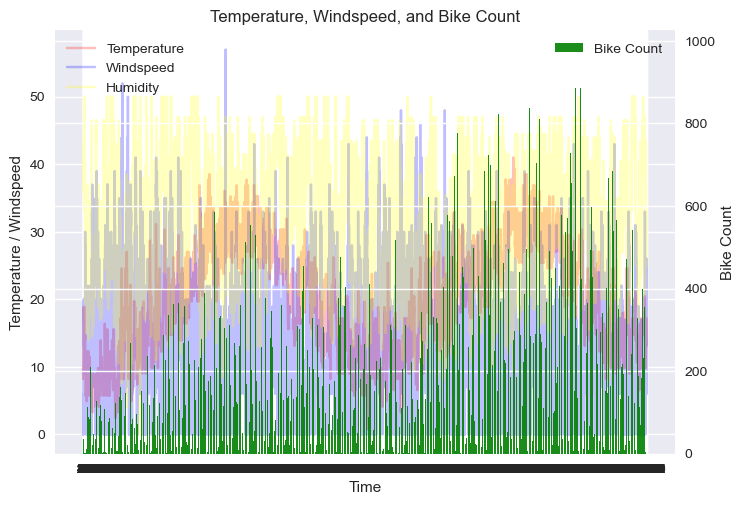

In [26]:
# Create a figure and axes
fig, ax1 = plt.subplots()

# Plot temperature and windspeed as line plots
ax1.plot(train['temp'], color='red', label='Temperature',alpha=0.25)
ax1.plot(train['windspeed'], color='blue', label='Windspeed',alpha=0.25)
ax1.plot(train['humidity']/2, color='yellow', label='Humidity',alpha=0.25)
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature / Windspeed')
ax1.legend(loc='upper left')

# Create a twin axes for the bar plot
ax2 = ax1.twinx()

# Plot product count as a bar plot
ax2.bar(range(len(train['count'])), train['count'], color='green', alpha=0.9, label='Bike Count')
ax2.set_ylabel('Bike Count')
ax2.legend(loc='upper right')

# Set the x-axis ticks
ax1.set_xticks(range(len(train['temp'])))

# Add a title
plt.title('Temperature, Windspeed, and Bike Count')

# Display the plot
plt.show()

In [18]:

# Did not work well with autogluon
# def categorize_temperature(temp):
#     if temp < 10:
#         return 'cold'
#     elif temp >= 10 and temp < 23:
#         return 'mild'
#     else:
#         return 'hot'

# def categorize_wind_speed(windspeed):
#     if windspeed < 10:
#         return 'mild wind'
#     else:
#         return 'very windy'

# def categorize_humidity(humidity):
#     if humidity < 50:
#         return 'not humid'
#     else:
#         return 'very humid'

# # Apply the functions to create the features
# train['temperature_category'] = train['temp'].apply(categorize_temperature)
# train['wind_category'] = train['windspeed'].apply(categorize_wind_speed)
# train['humidity_category'] = train['humidity'].apply(categorize_humidity)

# test['temperature_category'] = test['temp'].apply(categorize_temperature)
# test['wind_category'] = test['windspeed'].apply(categorize_wind_speed)
# test['humidity_category'] = test['humidity'].apply(categorize_humidity)

In [19]:
#christmas day and others
train['holiday'] = train[['month', 'day', 'holiday']].apply(lambda x: (x['holiday'], 1)[x['month'] == 12 and (x['day'] in [24, 26, 31])], axis = 1)
train['workingday'] = train[['month', 'day', 'workingday']].apply(lambda x: (x['workingday'], 0)[x['month'] == 12 and x['day'] in [24, 31]], axis = 1)
test['holiday'] = test[['month', 'day', 'holiday']].apply(lambda x: (x['holiday'], 1)[x['month'] == 12 and (x['day'] in [24, 26, 31])], axis = 1)
test['workingday'] = test[['month', 'day', 'workingday']].apply(lambda x: (x['workingday'], 0)[x['month'] == 12 and x['day'] in [24, 31]], axis = 1)

In [29]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,week,day,hour,weekday,month,schoolholiday,issunday,peakhour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,2011,52,1,0,Saturday,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,2011,52,1,1,Saturday,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2011,52,1,2,Saturday,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,2011,52,1,3,Saturday,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,2011,52,1,4,Saturday,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,2012,51,19,19,Wednesday,12,0,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,2012,51,19,20,Wednesday,12,0,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,2012,51,19,21,Wednesday,12,0,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,2012,51,19,22,Wednesday,12,0,0,0


In [20]:
datetrain = pd.DatetimeIndex(train['datetime'])
train.set_index(datetrain, inplace=True)
datetest = pd.DatetimeIndex(test['datetime'])
test.set_index(datetest, inplace=True)

def find_day(day_start):
    day_end = day_start + pd.offsets.DateOffset(hours=23)
    return pd.date_range(day_start, day_end, freq="H")

train.loc[find_day(pd.datetime(2011, 4, 15)), "workingday"] = 1
train.loc[find_day(pd.datetime(2012, 4, 16)), "workingday"] = 1

test.loc[find_day(pd.datetime(2011, 11, 25)), "workingday"] = 0
test.loc[find_day(pd.datetime(2012, 11, 23)), "workingday"] = 0

train.loc[find_day(pd.datetime(2011, 4, 15)), "holiday"] = 0
train.loc[find_day(pd.datetime(2012, 4, 16)), "holiday"] = 0

test.loc[find_day(pd.datetime(2011, 11, 25)), "holiday"] = 1
test.loc[find_day(pd.datetime(2012, 11, 23)), "holiday"] = 1

test.loc[find_day(pd.datetime(2012, 5, 21)), "holiday"] = 1
train.loc[find_day(pd.datetime(2012, 6, 1)), "holiday"] = 1

In [21]:
train['ideal'] = train[['temp', 'windspeed']].apply(lambda x: (0, 1)[x['temp'] > 27 and x['windspeed'] < 30], axis = 1)
train['hothumid'] = train[['humidity', 'workingday']].apply(lambda x: (0, 1)[x['workingday'] == 1 and x['humidity'] >= 60], axis = 1)
train['coldwindy'] = train[['temp', 'windspeed']].apply(lambda x: (0, 1)[x['temp'] < 15 and x['windspeed'] > 25], axis = 1)
test['ideal'] = test[['temp', 'windspeed']].apply(lambda x: (0, 1)[x['temp'] > 27 and x['windspeed'] < 30], axis = 1)
test['hothumid'] = test[['humidity', 'workingday']].apply(lambda x: (0, 1)[x['workingday'] == 1 and x['humidity'] >= 60], axis = 1)
test['coldwindy'] = test[['temp', 'windspeed']].apply(lambda x: (0, 1)[x['temp'] < 15 and x['windspeed'] > 25], axis = 1)

In [22]:
def one_hot_encoding(df, columns):
    for column in columns:
        df = pd.concat([df, pd.get_dummies(df[column], prefix=column, drop_first=True)], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

categorical_features = ['year', 'month', 'hour', 'season', 'weather']

train = one_hot_encoding(train, categorical_features)
test = one_hot_encoding(test, categorical_features)

In [23]:
train

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,count,week,day,...,hour_20,hour_21,hour_22,hour_23,season_2,season_3,season_4,weather_2,weather_3,weather_4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0000,16,52,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0000,40,52,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0000,32,52,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0000,13,52,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0000,1,52,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,2012-12-19 19:00:00,0,1,15.58,19.695,50,26.0027,336,51,19,...,0,0,0,0,0,0,1,0,0,0
2012-12-19 20:00:00,2012-12-19 20:00:00,0,1,14.76,17.425,57,15.0013,241,51,19,...,1,0,0,0,0,0,1,0,0,0
2012-12-19 21:00:00,2012-12-19 21:00:00,0,1,13.94,15.910,61,15.0013,168,51,19,...,0,1,0,0,0,0,1,0,0,0


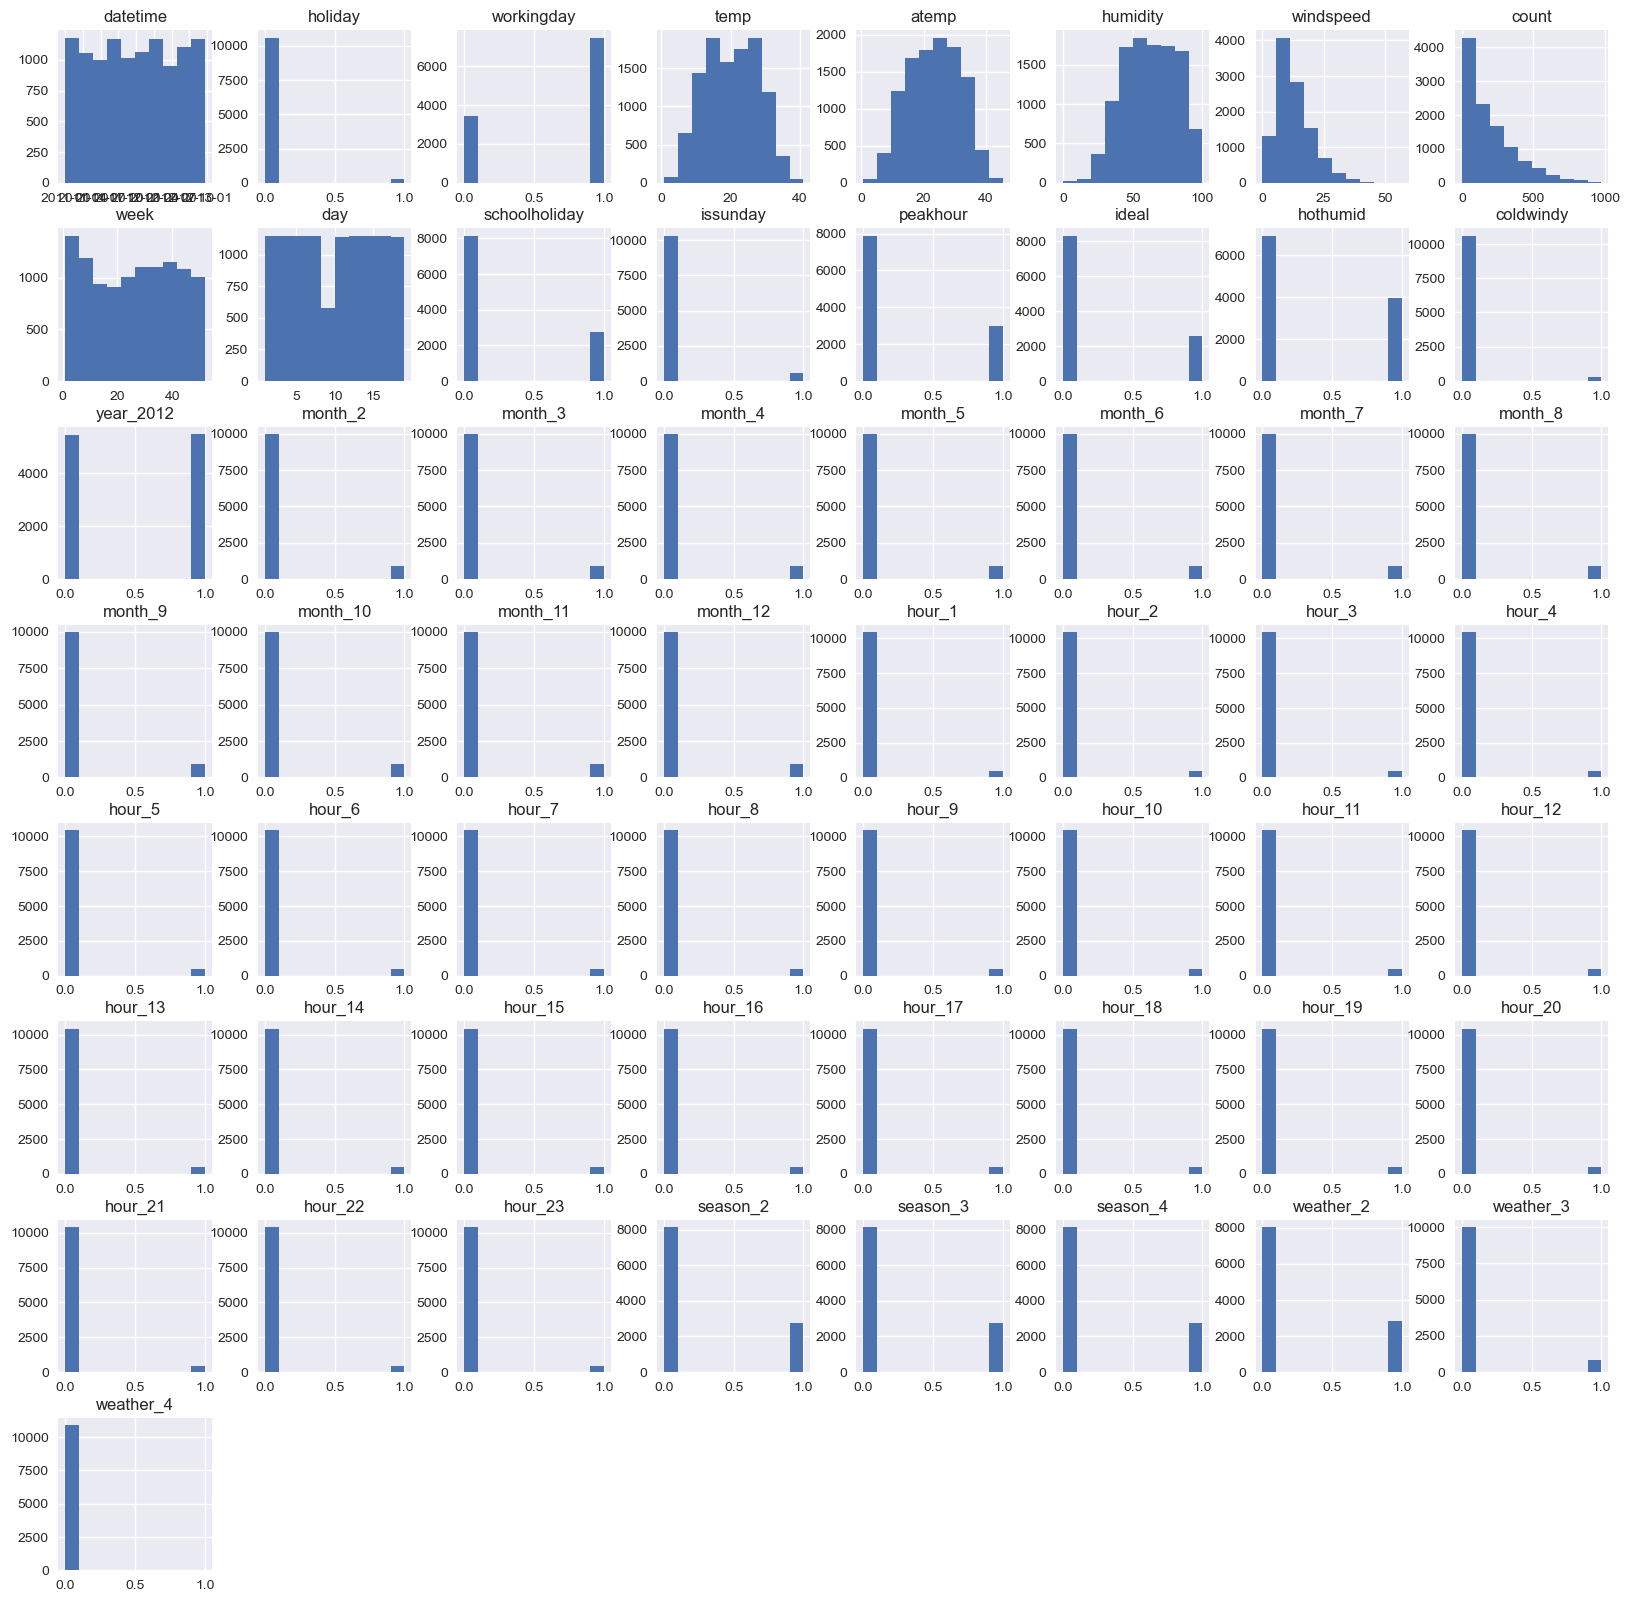

In [24]:
train.hist(figsize=(20, 20));

In [35]:
# Scaling the data has no POSITIVE effect on the score. It reduces the score.
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = MinMaxScaler()
# train[['temp', 'atemp', 'humidity', 'windspeed','week','hour','month']] = scaler.fit_transform(train[['temp', 'atemp', 'humidity', 'windspeed','week','hour','month']])
# test[['temp', 'atemp', 'humidity', 'windspeed','week','hour','month']] = scaler.transform(test[['temp', 'atemp', 'humidity', 'windspeed','week','hour','month']])

In [36]:
# Did not work
# def assign_frame(hour):
#     return hour // 6  # Assigns the same value to hours 0-5, 6-11, 12-17, and 18-23

# # Apply the function to create a new 'hour_frame' column
# train['hour_group'] = train['hour'].apply(assign_frame)
# test['hour_group'] = test['hour'].apply(assign_frame)

In [37]:
#Outliers analysis did not produce desirable results with autogluon
# import numpy as np

# def detect_outliers_3sigma(data):
#     mean = np.mean(data)
#     std = np.std(data)
#     cutoff = 3 * std
#     lower, upper = mean-3*std, mean+3*std
#     outliers = [x for x in data if np.abs(x - mean) > cutoff]
#     print(f"There are {len(outliers)} outliers based on 3 standard deviation rule")

# def delete_outliers(data, df):
#     original_shape = df.shape
#     mean = np.mean(data)
#     std = np.std(data)
#     outliers=np.abs(data-mean) > (3*std)
#     outliers_num = len(train[outliers])
#     df.drop(index=data[outliers].index, inplace=True)
#     print("Deleted",outliers_num,"outliers")
#     print ("Shape Before Delete Ouliers: ",original_shape)
#     print ("Shape After Delete Ouliers: ",df.shape)

# detect_outliers_3sigma(train['count'])

# delete_outliers(train['count'], train)

In [25]:
train=train.drop(['datetime','day','weather_4'],axis=1)
test=test.drop(['datetime','day'],axis=1)

In [39]:
train

,holiday,workingday,temp,atemp,humidity,windspeed,count,week,weekday,schoolholiday,...,hour_19,hour_20,hour_21,hour_22,hour_23,season_2,season_3,season_4,weather_2,weather_3
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0000,16,52,Saturday,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0000,40,52,Saturday,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0000,32,52,Saturday,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0000,13,52,Saturday,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0000,1,52,Saturday,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,0,1,15.58,19.695,50,26.0027,336,51,Wednesday,0,...,1,0,0,0,0,0,0,1,0,0
2012-12-19 20:00:00,0,1,14.76,17.425,57,15.0013,241,51,Wednesday,0,...,0,1,0,0,0,0,0,1,0,0
2012-12-19 21:00:00,0,1,13.94,15.910,61,15.0013,168,51,Wednesday,0,...,0,0,1,0,0,0,0,1,0,0


In [26]:
weekday_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
train['weekday'] = train['weekday'].map(weekday_mapping)
train['weekday'] = train['weekday'].astype('category')
test['weekday'] = test['weekday'].map(weekday_mapping)
test['weekday'] = test['weekday'].astype('category')

In [41]:
# These features did not work well with autogluon
# temperature_category_map = {'cold': 0, 'mild': 1, 'hot': 2}
# humidity_category_map = {'not humid': 0, 'very humid': 1}
# wind_category_map = {'mild wind': 0, 'very windy': 1}

# train['temperature_category'] = train['temperature_category'].map(temperature_category_map)
# train['temperature_category'] = train['temperature_category'].astype('category')
# test['temperature_category'] = test['temperature_category'].map(temperature_category_map)
# test['temperature_category'] = test['temperature_category'].astype('category')

# train['humidity_category'] = train['humidity_category'].map(humidity_category_map)
# train['humidity_category'] = train['humidity_category'].astype('category')
# test['humidity_category'] = test['humidity_category'].map(humidity_category_map)
# test['humidity_category'] = test['humidity_category'].astype('category')

# train['wind_category'] = train['wind_category'].map(wind_category_map)
# train['wind_category'] = train['wind_category'].astype('category')
# test['wind_category'] = test['wind_category'].map(wind_category_map)
# test['wind_category'] = test['wind_category'].astype('category')


In [27]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

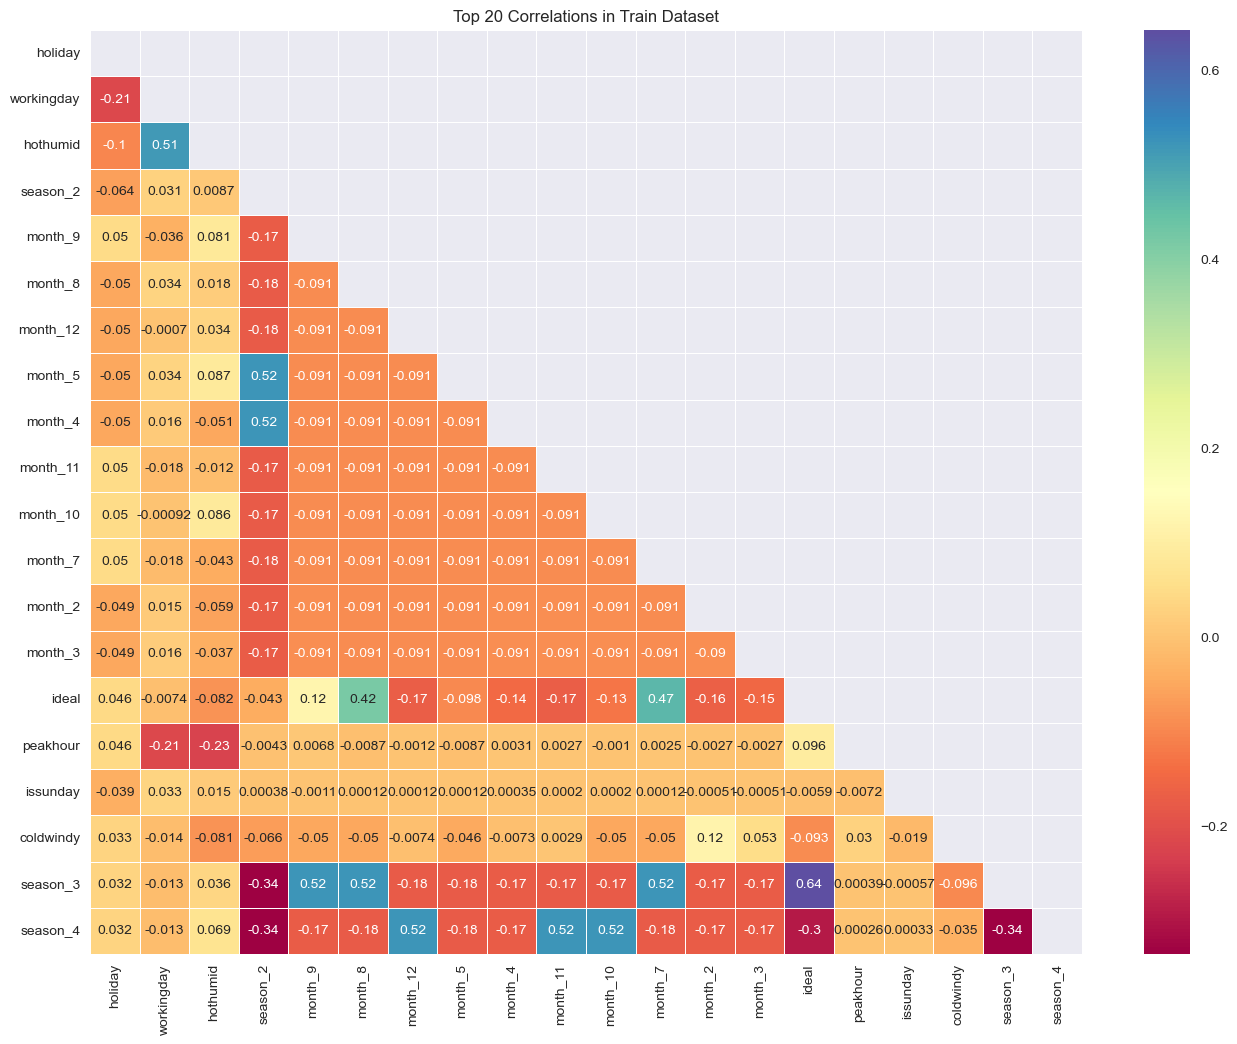

In [28]:
import numpy as np
def plot_top_correlations(df: pd.core.frame.DataFrame, n: int, title_name: str='Top Correlations') -> None:
    # Calculate correlation between all variables
    corr = df.corr()

    # Select variables having highest absolute correlation
    top_corr_cols = corr.abs().nlargest(n, columns=corr.columns).index
    top_corr = corr.loc[top_corr_cols, top_corr_cols]

    fig, axes = plt.subplots(figsize=(16, 12))
    mask = np.zeros_like(top_corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(top_corr, mask=mask, linewidths=.5, cmap='Spectral', annot=True)
    plt.title(title_name)
    plt.show()

# Plot heatmap of top 12 correlations in training data
plot_top_correlations(train, 20, 'Top 20 Correlations in Train Dataset')

In [44]:
train

,holiday,workingday,temp,atemp,humidity,windspeed,count,week,weekday,schoolholiday,...,hour_19,hour_20,hour_21,hour_22,hour_23,season_2,season_3,season_4,weather_2,weather_3
0,0,0,9.84,14.395,81,0.0000,16,52,5,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,9.02,13.635,80,0.0000,40,52,5,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,9.02,13.635,80,0.0000,32,52,5,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,9.84,14.395,75,0.0000,13,52,5,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,9.84,14.395,75,0.0000,1,52,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,19.695,50,26.0027,336,51,2,0,...,1,0,0,0,0,0,0,1,0,0
10882,0,1,14.76,17.425,57,15.0013,241,51,2,0,...,0,1,0,0,0,0,0,1,0,0
10883,0,1,13.94,15.910,61,15.0013,168,51,2,0,...,0,0,1,0,0,0,0,1,0,0
10884,0,1,13.94,17.425,61,6.0032,129,51,2,0,...,0,0,0,1,0,0,0,1,0,0


In [1]:
# Finally, Feature Selection
from powershap  import PowerShap
from catboost import CatBoostRegressor,CatBoostClassifier

selector = PowerShap(
    model = CatBoostRegressor(verbose=0, n_estimators=300,use_best_model=True),
    power_iterations=50,automatic=True, limit_automatic=20,verbose=True,target_col='count',
)
selector.fit(train.drop(columns=['count']), train['count'])
t = selector._processed_shaps_df

NameError: name 'train' is not defined

In [ ]:
t

,impact,p_value,effect_size,power_0.01_alpha,0.99_power_its_req
peakhour,74.480034,0.0,-43.961802,1.0,2.078884
year_2012,43.068405,0.0,-155.0787,1.0,[10.0]
temp,21.072535,0.0,-6.847183,1.0,3.304659
week,19.878584,0.0,-16.660777,1.0,2.492627
humidity,18.776327,0.0,-29.961761,1.0,2.211391
atemp,16.473207,0.0,-8.154996,1.0,3.082346
hour_19,10.409683,0.0,-26.286221,1.0,2.264466
workingday,10.394569,0.0,-11.904208,1.0,2.72208
weekday,9.78492,0.0,-26.135624,1.0,2.266904
hour_16,9.031155,0.0,-28.730431,1.0,2.227914


In [38]:
# Did not work
# train=train.drop(['hour_23','holiday',
#                   'month_5','month_8','season_3','month_9','issunday','season_2','month_6','month_3','month_2','month_11','month_12','weather_4'],axis=1)
# test=test.drop(['hour_23','holiday',
#                   'month_5','month_8','season_3','month_9','issunday','season_2','month_6','month_3','month_2','month_11','month_12','weather_4'],axis=1)

In [29]:
train['count'] = np.log(train['count'])

In [46]:
train

,holiday,workingday,temp,atemp,humidity,windspeed,count,week,weekday,schoolholiday,...,hour_19,hour_20,hour_21,hour_22,hour_23,season_2,season_3,season_4,weather_2,weather_3
0,0,0,9.84,14.395,81,0.0000,2.772589,52,5,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,9.02,13.635,80,0.0000,3.688879,52,5,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,9.02,13.635,80,0.0000,3.465736,52,5,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,9.84,14.395,75,0.0000,2.564949,52,5,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,9.84,14.395,75,0.0000,0.000000,52,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,19.695,50,26.0027,5.817111,51,2,0,...,1,0,0,0,0,0,0,1,0,0
10882,0,1,14.76,17.425,57,15.0013,5.484797,51,2,0,...,0,1,0,0,0,0,0,1,0,0
10883,0,1,13.94,15.910,61,15.0013,5.123964,51,2,0,...,0,0,1,0,0,0,0,1,0,0
10884,0,1,13.94,17.425,61,6.0032,4.859812,51,2,0,...,0,0,0,1,0,0,0,1,0,0


## Step 5: Rerun the model with the same settings as before, just with more features

In [41]:
predictor_new_features = TabularPredictor(label="count",eval_metric='root_mean_squared_error').fit(train_data=train, time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels\ag-20230521_165631\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels\ag-20230521_165631\"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    10886
Train Data Columns: 58
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (6.884486652042782, 0.0, 4.55256, 1.48904)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Gene

In [42]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2  -0.299951       1.547673  344.248764                0.000000           0.223772            2       True         12
1      WeightedEnsemble_L3  -0.301490       4.155592  459.600406                0.001012           0.207119            3       True         22
2          CatBoost_BAG_L2  -0.303265       2.949825  415.402272                0.042648          43.289914            2       True         16
3          LightGBM_BAG_L2  -0.305968       2.967916  373.859576                0.060739           1.747219            2       True         14
4     ExtraTreesMSE_BAG_L2  -0.306751       3.348207  374.583641                0.441031           2.471283            2       True         17
5        LightGBMXT_BAG_L2  -0.306834       2.991493  374.162156                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFa

In [43]:
# Remember to set all negative values to zero
y_pred = np.exp(predictor_new_features.predict(test))
y_pred=pd.DataFrame(y_pred,columns=['count'])
y_pred

,count
0,13.547440
1,4.441331
2,2.792500
3,2.276830
4,1.746319
...,...
6488,101.148087
6489,101.489952
6490,74.604904
6491,57.875893


In [44]:
y_pred.describe()

,count
count,6493.000000
mean,183.969818
std,174.318665
min,1.113170
25%,39.687698
50%,137.739532
75%,273.385986
max,909.452148


In [45]:
y_pred[y_pred['count'] < 0] = 0

In [46]:
y_pred.describe()

,count
count,6493.000000
mean,183.969818
std,174.318665
min,1.113170
25%,39.687698
50%,137.739532
75%,273.385986
max,909.452148


In [47]:
# Same submitting predictions
submission["count"] = y_pred
submission.to_csv("submission_new_features.csv", index=False)


In [48]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features 6"

Successfully submitted to Bike Sharing Demand


  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|▍         | 8.00k/194k [00:00<00:02, 65.6kB/s]
100%|██████████| 194k/194k [00:02<00:00, 87.4kB/s] 


In [49]:
!kaggle competitions submissions -c bike-sharing-demand 

fileName                     date                 description                                                                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------------------------------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-21 17:05:36  new features 6                                                                     complete  0.35635      0.35635       
submission_new_features.csv  2023-05-21 15:52:53  new features 5 No FS with coldwindy 15 short train                                 complete  0.35696      0.35696       
submission_new_hpo.csv       2023-05-21 15:45:22  new features 5 with hyperparameters 5                                              complete  0.35579      0.35579       
submission_new_features.csv  2023-05-21 14:05:50  new features 5 No FS with coldwindy 15                                             complete  0.

#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [47]:
# from sklearn.model_selection import train_test_split


# train_data1, val_data1, train_labels1, val_labels1 = train_test_split(train, train['count'], test_size=0.2, random_state=42)

In [30]:
import autogluon.core as ag

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 30,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(5e-5, 5e-3, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': ag.space.Real(0.3, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 250,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=50, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 2*60  # train various models for ~2 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label="count",eval_metric='root_mean_squared_error').fit(
    train_data=train, time_limit=800, presets="best_quality", 
    hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,use_bag_holdout=True)

Fitted model: NeuralNetTorch_BAG_L2\c33cb583 ...
	-0.3162	 = Validation score   (-root_mean_squared_error)
	15.59s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L2\6bb1b0a8 ...
	-0.3192	 = Validation score   (-root_mean_squared_error)
	19.48s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L2\16e212e9 ...
	-0.3188	 = Validation score   (-root_mean_squared_error)
	24.24s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L2\7dee16e5 ...
	-0.3358	 = Validation score   (-root_mean_squared_error)
	20.21s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L2\6868cb71 ...
	-0.3169	 = Validation score   (-root_mean_squared_error)
	10.59s	 = Training   runtime
	0.0s	 = Validation runtime
Repeating k-fold bagging: 2/20
Fitting model: LightGBM_BAG_L2\T1 ... Training model for up to 313.61s of the 313.61s of remaining time.
	Fitting 8 child models (S2F1 - S2F8) |

In [50]:
# predictor_new_hpo = TabularPredictor(label="count",eval_metric='root_mean_squared_error').fit(train_data=train, time_limit=600, presets="best_quality",
#                                                                                               auto_stack = True, num_bag_folds=8, num_bag_sets=20, num_stack_levels=2,
#                                                                                               )

In [31]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                             model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              WeightedEnsemble_L3  -0.320456       1.463844  594.656741                0.000161           0.141373            3       True         22
1   NeuralNetTorch_BAG_L2\c33cb583  -0.322333       1.244097  555.527636                0.098667          32.347253            2       True         17
2               LightGBM_BAG_L2\T2  -0.324268       1.251781  530.351915                0.106351           7.171532            2       True         13
3              WeightedEnsemble_L2  -0.324807       0.377356  238.072740                0.000000           0.144016            2       True         11
4               LightGBM_BAG_L2\T3  -0.324965       1.248592  530.524492                0.103163           7.344108            2       True         14
5   NeuralNetTorch_BAG_L2\6868cb

{'model_types': {'LightGBM_BAG_L1\\T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T5': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L1\\8730dd59': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L1\\9619fe4c': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L1\\33e7b0fe': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L1\\d7505513': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L1\\d2d2d653': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2\\T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T5': 'StackerEnsembleMo

In [32]:
# Remember to set all negative values to zero
y_pred = np.exp(predictor_new_hpo.predict(test))
y_pred=pd.DataFrame(y_pred,columns=['count'])
y_pred

,count
0,10.540595
1,4.446489
2,2.540761
3,2.232653
4,2.170902
...,...
6488,85.795807
6489,104.274010
6490,78.034500
6491,63.686321


In [33]:
y_pred[y_pred['count'] < 0] = 0
y_pred.describe()

,count
count,6493.000000
mean,182.938705
std,171.182022
min,1.736217
25%,39.204250
50%,138.539597
75%,276.339905
max,787.961182


In [34]:
# Same submitting predictions
submission["count"] = y_pred
submission.to_csv("submission_new_hpo.csv", index=False)

In [35]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features 5 with hyperparameters 8"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|▍         | 8.00k/194k [00:00<00:02, 73.3kB/s]
100%|██████████| 194k/194k [00:02<00:00, 87.3kB/s] 


In [36]:
!kaggle competitions submissions -c bike-sharing-demand 

fileName                     date                 description                                                                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------------------------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-23 21:43:57  new features 5 with hyperparameters 8                                              complete  0.36194      0.36194       
submission_new_hpo.csv       2023-05-23 19:11:03  new features 5 with hyperparameters 7                                              complete  0.36073      0.36073       
submission_new_hpo.csv       2023-05-23 18:34:34  new features 5 with hyperparameters 6                                              complete  0.35579      0.35579       
submission_new_features.csv  2023-05-21 17:05:36  new features 6                                                                     complete  0.

#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

### Hyperparameter and Features table

In [38]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "Progress and change": ['Features', 'Hyperparameters', 'public score'],
    "First raw submission": ['No Change', 'No Change', 1.77579],
    "Implement year and month": ['datetime features year and month', 'No Change', 0.73246],
    "Add rest of Datetime and Peakhour": ['Add rest of Datetime and Peakhour', 'No Change', 0.51173],
    "Add hothumid and ideal Features": ['Remove Day', 'No Change', 0.44417],
    "Convert count to log": ['Take log of count', 'No Change', 0.38475],
    "Hyperparameters 1": ['No Change', 'num_bag_folds=5, num_bag_sets=5, num_stack_levels=1', 0.38517],
    "Hyperparameters 2": ['No Change', 'num_bag_folds=2, num_bag_sets=5, num_stack_levels=1', 0.38834],
    "Hyperparameters 3": ['No Change', 'num_bag_folds=5, num_bag_sets=5, num_stack_levels=2', 0.38768], 
    "Use Standard Scaler and Minmax Scaler": ['Scale the data', 'No Change', 0.39277],
    "One hot encoding of Features": ['One hot encoding', 'No Change', 0.36074],
    "Change workday and holidays for specific dates": ['Work/Holiday Adjustment', 'No Change', 0.35666],
    "Implement coldwindy": ['ColdWindy', 'Best Model no hpt', 0.35412],
    "Hyperparameter Tuning 1": ['Create validation dataset', 'NN: num_epochs: 30,learning_rate: 1e-4, 5e-3, activation:relu, softrelu, tanh, dropout_prob 0.1, 0.5 GBM:num_boost_round: 100,num_leaves lower=26, upper=66, default=36', 0.35579],
    "Hyperparameter Tuning 2": ['Create validation dataset', 'NN: num_epochs: 30,learning_rate: 5e-5, 5e-3, activation:relu, softrelu, tanh, dropout_prob 0.1, 0.5 GBM:num_boost_round: 250,num_leaves lower=26, upper=66, default=36', 0.36073],
    "Hyperparameter Tuning 3": ['No Validation dataset', 'NN: num_epochs: 30,learning_rate: 5e-5, 5e-3, activation:relu, softrelu, tanh, dropout_prob 0.3, 0.5 GBM:num_boost_round: 250,num_leaves lower=26, upper=50, default=36', 0.36194]
}).T

,0,1,2
Progress and change,Features,Hyperparameters,public score
First raw submission,No Change,No Change,1.77579
Implement year and month,datetime features year and month,No Change,0.73246
Add rest of Datetime and Peakhour,Add rest of Datetime and Peakhour,No Change,0.51173
Add hothumid and ideal Features,Remove Day,No Change,0.44417
Convert count to log,Take log of count,No Change,0.38475
Hyperparameters 1,No Change,"num_bag_folds=5, num_bag_sets=5, num_stack_lev...",0.38517
Hyperparameters 2,No Change,"num_bag_folds=2, num_bag_sets=5, num_stack_lev...",0.38834
Hyperparameters 3,No Change,"num_bag_folds=5, num_bag_sets=5, num_stack_lev...",0.38768
Use Standard Scaler and Minmax Scaler,Scale the data,No Change,0.39277


In [65]:
# Create a list of dictionaries containing the data
data1 = [
    ['submission_new_features.csv', '2023-05-21 17:05:36', 'new features 6', 'complete', 0.35635, 0.35635],
    ['submission_new_features.csv', '2023-05-21 15:52:53', 'new features 5 No FS with coldwindy 15 short train', 'complete', 0.35696, 0.35696],
    ['submission_new_hpo.csv', '2023-05-21 15:45:22', 'new features 5 with hyperparameters 5', 'complete', 0.35579, 0.35579],
    ['submission_new_features.csv', '2023-05-21 14:05:50', 'new features 5 No FS with coldwindy 15', 'complete', 0.35412, 0.35412],
    ['submission_new_features.csv', '2023-05-21 13:44:34', 'new features 5 No FS with coldwindy', 'complete', 0.35503, 0.35503],
    ['submission_new_features.csv', '2023-05-21 12:31:38', 'new features 5 No FS change work and holidays', 'complete', 0.35666, 0.35666],
    ['submission_new_features.csv', '2023-05-21 03:12:39', 'new features 5 No FS', 'complete', 0.36042, 0.36042],
    ['submission_new_features.csv', '2023-05-21 03:01:42', 'new features 5 Feature Selection with PowerShap', 'complete', 0.37264, 0.37264],
    ['submission_new_features.csv', '2023-05-21 02:46:17', 'new features 5 Feature Selection with PowerShap', 'complete', 0.37139, 0.37139],
    ['submission_new_features.csv', '2023-05-21 02:23:34', 'new features 5 Feature Selection with PowerShap', 'complete', 0.37724, 0.37724],
    ['submission_new_features.csv', '2023-05-21 02:01:24', 'new features 5 Feature Selection', 'complete', 0.37348, 0.37348],
    ['submission_new_features.csv', '2023-05-21 01:50:01', 'new features 5 weekday One hot encoding', 'complete', 0.36094, 0.36094],
    ['submission_new_features.csv', '2023-05-20 22:14:39', 'new features 5 One hot encoding', 'complete', 0.36074, 0.36074],
    ['submission_new_features.csv', '2023-05-20 21:52:33', 'new features 5 add day again and convert count to log numerical features MMscaled', 'complete', 0.38888, 0.38888],
    ['submission_new_features.csv', '2023-05-20 21:40:30', 'new features 5 add day again and convert count to log numerical features sscaled', 'complete', 0.39277, 0.39277],
    ['submission_new_hpo.csv', '2023-05-20 19:44:01', 'new features 5 with hyperparameters 4', 'complete', 0.38768, 0.38768],
    ['submission_new_hpo.csv', '2023-05-20 19:32:31', 'new features 5 with hyperparameters 3', 'complete', 0.38834, 0.38834],
    ['submission_new_hpo.csv', '2023-05-20 19:22:16', 'new features 5 with hyperparameters 2', 'complete', 0.38517, 0.38517],
    ['submission_new_features.csv', '2023-05-20 18:16:56', 'new features 5 add day again and convert count to log', 'complete', 0.38475, 0.38475],
    ['submission_new_features.csv', '2023-05-20 17:58:55', 'new features 5 remove day', 'complete', 0.44417, 0.44417],
    ['submission_new_features.csv', '2023-05-20 17:44:35', 'new features 5 remove month', 'complete', 0.51173, 0.51173],
    ['submission_new_features.csv', '2023-05-20 17:33:47', 'new features 5 remove atemp', 'complete', 0.51861, 0.51861],
    ['submission_new_features.csv', '2023-05-20 17:07:24', 'new features 6', 'complete', 0.43194, 0.43194],
    ['submission_new_features.csv', '2023-05-20 16:41:28', 'new features 5 outliers removed', 'complete', 0.44265, 0.44265],
    ['submission_new_features.csv', '2023-05-20 15:44:27', 'new features 5', 'complete', 0.43083, 0.43083],
    ['submission_new_features.csv', '2023-05-20 15:16:17', 'new features with windfill peakhour 4', 'complete', 0.43365, 0.43365],
    ['submission_new_features.csv', '2023-05-20 15:16:03', 'new features with windfill peakhour 3', 'complete', 0.43365, 0.43365],
    ['submission_new_features.csv', '2023-05-20 14:02:44', 'new features with windfill peakhour 3', 'complete', 1.86528, 1.86528],
    ['submission_new_features.csv', '2023-05-20 13:46:45', 'new features with windfill peakhour 2', 'complete', 1.67317, 1.67317],
    ['submission_new_features.csv', '2023-05-20 13:26:52', 'new features with windfill peakhour', 'complete', 1.67004, 1.67004],

]

data2= [
    ['submission_new_hpo.csv', '2023-05-15 18:04:20', 'new features with hyperparameters 2', 'complete', 0.70508, 0.70508],
    ['submission_new_hpo.csv', '2023-05-15 17:53:12', 'new features with hyperparameters 3', 'complete', 0.69017, 0.69017],
    ['submission_new_hpo.csv', '2023-05-15 16:59:56', 'new features with hyperparameters', 'complete', 0.75401, 0.75401],
    ['submission_new_hpo.csv', '2023-05-15 16:59:00', 'new features with hyperparameters', 'error', None, None],
    ['submission_new_features.csv', '2023-05-15 15:01:39', 'new features', 'complete', 0.73246, 0.73246],
    ['submission.csv', '2023-05-15 14:30:45', 'first raw submission', 'complete', 1.77579, 1.77579]
]

df1 = pd.DataFrame(data1, columns=['fileName', 'date', 'description', 'status', 'publicScore', 'privateScore'])
df1['date'] = pd.to_datetime(df1['date'])

df1.head()

,fileName,date,description,status,publicScore,privateScore
0,submission_new_features.csv,2023-05-21 17:05:36,new features 6,complete,0.35635,0.35635
1,submission_new_features.csv,2023-05-21 15:52:53,new features 5 No FS with coldwindy 15 short train,complete,0.35696,0.35696
2,submission_new_hpo.csv,2023-05-21 15:45:22,new features 5 with hyperparameters 5,complete,0.35579,0.35579
3,submission_new_features.csv,2023-05-21 14:05:50,new features 5 No FS with coldwindy 15,complete,0.35412,0.35412
4,submission_new_features.csv,2023-05-21 13:44:34,new features 5 No FS with coldwindy,complete,0.35503,0.35503


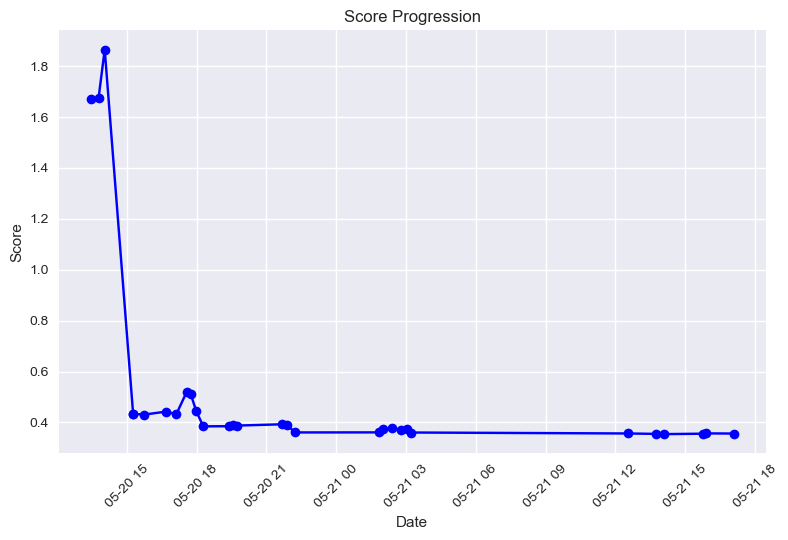

In [66]:
# Extract the dates and scores
dates = df1['date']
scores = df1['publicScore']

# Convert the dates to datetime objects
dates = pd.to_datetime(dates)

# Sort the dates and scores in ascending order
dates, scores = zip(*sorted(zip(dates, scores)))

# Plot the line graph
plt.plot(dates, scores, marker='o', linestyle='-', color='b')

# Set the axis labels and title
plt.xlabel('Date')
plt.ylabel('Score')
plt.title('Score Progression')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

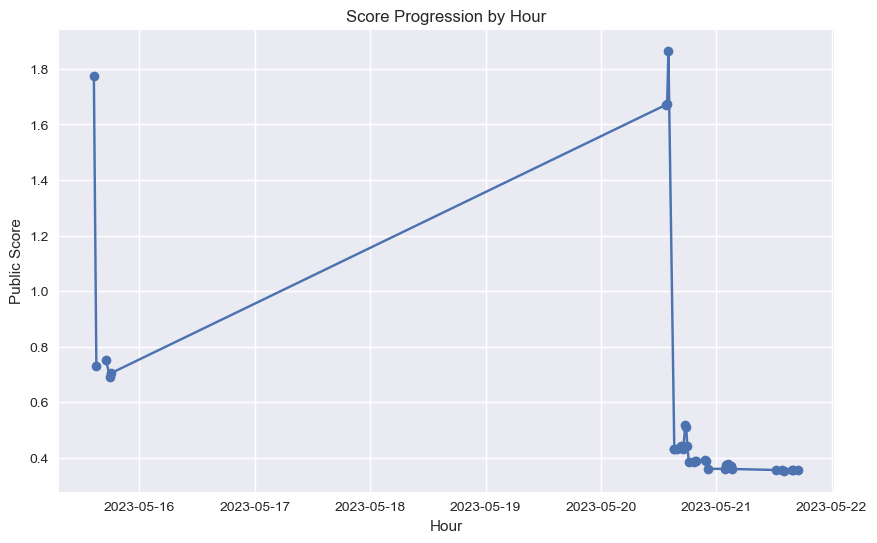

In [63]:

df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour

df.sort_index(inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['publicScore'], marker='o')
plt.xlabel('Hour')
plt.ylabel('Public Score')
plt.title('Score Progression by Hour')
plt.grid(True)
plt.show()

# What Worked and What Didn't

 I wasn't very succesful at tuning the specific hyperparameters.
 The best results were obtained through EDA and Feature Engineering. 
 The engineered features include: 
 ### 1-) Datetime features (Month, Weekday, Season, year, week, schoolday and isholiday) 
 ### 2-) If the day is a special day like Christmas or Halloween or holiday or tax day 
 ### 3-) Scaling the data didn't work 
 ### 4-) Power transform might work on windspeed and humidity (to make them more gaussian) but I didn't investigate this. 
 ### 5-) One hot encoding did work on time variables and weather ('year', 'month', 'hour', 'season', 'weather') increased the score 
 ### 6-) I have engineered a few features after creating the plot with temp, humidity and windspeed. These features are ishumid, ideal and coldwindy. 
 ### 7-) Converting count column to log(count) increased the score greatly. 
 ### 8-) Trying to categorize or bin the temp, windspeed and humidity didn't work for me. 
 ### 9-) Categorizing weekday helped with the score 
 ### 10-) Outlier detection and removing counts that are out of 3 std range didn't increase performance 
 ### 11-) Feature selection after engineering reduced the score. I need to look into another feature selection algorithm or run the selection algorithm longer. 
 ### 12-) Categorizing hour variable into 4 different timeframes didn't work

# HPO , RESULTS AND DISCUSSION

In [42]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "Progress and change": ['Features', 'Hyperparameters', 'public score'],
    "Convert count to log": ['Take log of count', 'No Change', 0.38475],
    "HPO 1 Autogluon": ['No Change', 'num_bag_folds=5, num_bag_sets=5, num_stack_levels=1', 0.38517],
    "HPO 2 Autogluon": ['No Change', 'num_bag_folds=2, num_bag_sets=5, num_stack_levels=1', 0.38834],
    "HPO 3 Autogluon": ['No Change', 'num_bag_folds=5, num_bag_sets=5, num_stack_levels=2', 0.38768], 
    "Implement coldwindy": ['ColdWindy', 'Best Model no hpt', 0.35412],
    "HPO 1 NN and GBM specific": ['Create validation dataset', 'NN: num_epochs: 30,learning_rate: 1e-4, 5e-3, activation:relu, softrelu, tanh, dropout_prob 0.1, 0.5 GBM:num_boost_round: 100,num_leaves lower=26, upper=66, default=36', 0.35579],
    "HPO 2 NN and GBM specific": ['Create validation dataset', 'NN: num_epochs: 30,learning_rate: 5e-5, 5e-3, activation:relu, softrelu, tanh, dropout_prob 0.1, 0.5 GBM:num_boost_round: 250,num_leaves lower=26, upper=66, default=36', 0.36073],
    "HPO 3 NN and GBM specific": ['No Validation dataset', 'NN: num_epochs: 30,learning_rate: 5e-5, 5e-3, activation:relu, softrelu, tanh, dropout_prob 0.3, 0.5 GBM:num_boost_round: 250,num_leaves lower=26, upper=50, default=36', 0.36194]
}).T

,0,1,2
Progress and change,Features,Hyperparameters,public score
Convert count to log,Take log of count,No Change,0.38475
HPO 1 Autogluon,No Change,"num_bag_folds=5, num_bag_sets=5, num_stack_lev...",0.38517
HPO 2 Autogluon,No Change,"num_bag_folds=2, num_bag_sets=5, num_stack_lev...",0.38834
HPO 3 Autogluon,No Change,"num_bag_folds=5, num_bag_sets=5, num_stack_lev...",0.38768
Implement coldwindy,ColdWindy,Best Model no hpt,0.35412
HPO 1 NN and GBM specific,Create validation dataset,"NN: num_epochs: 30,learning_rate: 1e-4, 5e-3, ...",0.35579
HPO 2 NN and GBM specific,Create validation dataset,"NN: num_epochs: 30,learning_rate: 5e-5, 5e-3, ...",0.36073
HPO 3 NN and GBM specific,No Validation dataset,"NN: num_epochs: 30,learning_rate: 5e-5, 5e-3, ...",0.36194


## Why did the change in hyperparameters didn't work?

After looking at the table above, we can see that hyperparameter tuning for algorithm-specific hyperparameters, as well as auto-gluon hyperparameters, did not result in more successful models. 

This is probably due to increased epochs for NNs and increased boost rounds for GBMs, which causes overfitting. Reduced learning rate ad increased dropout rate was not helpful as well. Also, creating a validation set was not beneficial. Autogluon is probably handling this by setting bagging and cross-validation by itself.
I can confirm this since I went with a smaller num_bag_folds=2 and smaller num_bag_sets=5 parameters than the default autogluon run parameters, resulting in a higher rmse and worse model performance. 